In [88]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Import Libraries and set required parameters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 200)

## 1.Import Data

In [90]:
application_data = pd.read_csv('application_data.csv')
application_data_AtStart = application_data.copy()
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## 2.Check Structure of Data

In [91]:
# Write your code for inspection here
print(application_data.shape)
application_data.info(verbose=True)

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL     

In [92]:
No_Of_Rows_AtStart,No_Of_Columns_AtStart=application_data.shape
No_Of_Rows_AtStart,No_Of_Columns_AtStart

(307511, 122)

In [93]:
groupColumnsBydtype = application_data.columns.to_series().groupby(application_data.dtypes).groups
groupColumnsBydtype

{dtype('int64'): Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21'],
       dtype='object'),
 dtype('float6

In [94]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## 3.Data Quality Check & Missing Values

### 3.1.Percentage of missing values for columns

In [95]:
# code for column-wise null percentages here
round(application_data.isnull().mean()*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

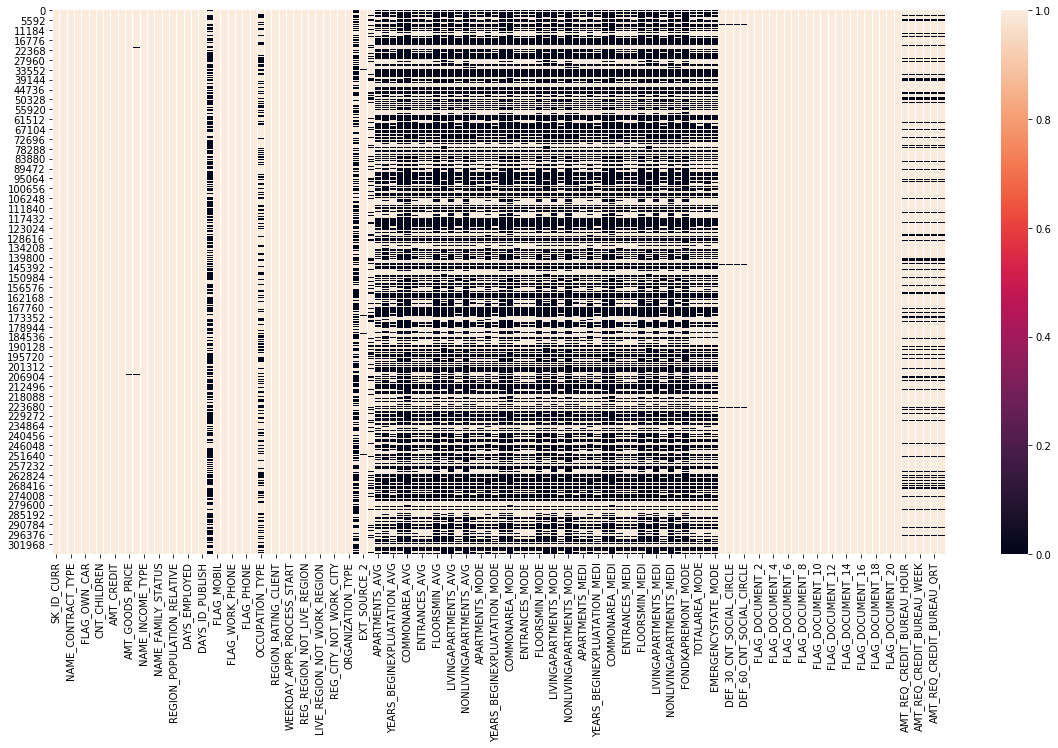

In [96]:
#vissualize missing values of columns using plot
plt.figure(figsize=(20,10))
sns.heatmap(application_data.notnull())
plt.show()

In [97]:
#Row wise % of missing values
round(application_data.isnull().sum(axis=1)/len(application_data.index)*100,2)

0         0.00
1         0.00
2         0.02
3         0.02
4         0.02
5         0.02
6         0.02
7         0.02
8         0.02
9         0.02
10        0.02
11        0.02
12        0.01
13        0.00
14        0.00
15        0.02
16        0.02
17        0.02
18        0.00
19        0.02
20        0.00
21        0.02
22        0.00
23        0.00
24        0.00
25        0.00
26        0.01
27        0.02
28        0.02
29        0.00
30        0.01
31        0.01
32        0.01
33        0.02
34        0.00
35        0.01
36        0.02
37        0.02
38        0.01
39        0.00
40        0.00
41        0.02
42        0.02
43        0.00
44        0.02
45        0.02
46        0.02
47        0.02
48        0.02
49        0.02
50        0.00
51        0.00
52        0.01
53        0.02
54        0.00
55        0.00
56        0.02
57        0.00
58        0.02
59        0.00
60        0.00
61        0.00
62        0.01
63        0.02
64        0.00
65        0.00
66        

### 3.2.Drop Columns with high missing values > 50%

In [98]:
# code for dropping the columns where missing values in columns > 5% 
cols = application_data.columns[application_data.isnull().mean()*100 >50]
application_data.drop(cols,axis=1,inplace=True)
application_data.shape

(307511, 81)

## 3.3.Missing Values Imputation for Columns where missing values < 13%

In [99]:
#Drop unnecesaory column
cols = application_data.columns[(application_data.isnull().mean()*100 >0) & (application_data.isnull().mean()*100 <=13)]
cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [100]:
application_data.NAME_TYPE_SUITE.value_counts(normalize=True,dropna=False)

Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

#### From above observation we observe that 80% of values are 'Unaccompanied' so Missing value should be replaced with 'Unaccompanied'

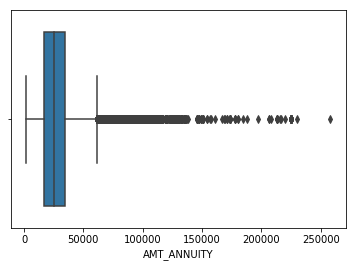

In [101]:
sns.boxplot(application_data.AMT_ANNUITY)

In [102]:
application_data.AMT_ANNUITY.mode()

0    9000.0
dtype: float64

#### From above boxplot we can see outliers are present in Column so missing values should be imputed with Mode i.e 9000

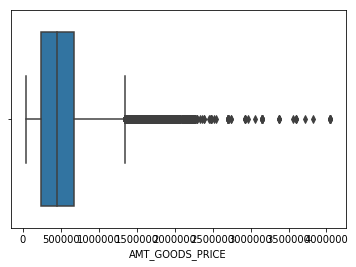

In [103]:
sns.boxplot(application_data.AMT_GOODS_PRICE)

In [104]:
application_data.AMT_GOODS_PRICE.mode()

0    450000.0
dtype: float64

#### From above boxplot we can see outliers are present in Column so missing values should be imputed with Mode i.e 450000

In [105]:
application_data.CNT_FAM_MEMBERS.value_counts(normalize=True,dropna=False)

 2.0     0.514964
 1.0     0.220633
 3.0     0.171054
 4.0     0.080313
 5.0     0.011310
 6.0     0.001327
 7.0     0.000263
 8.0     0.000065
 9.0     0.000020
 10.0    0.000010
 14.0    0.000007
 16.0    0.000007
 12.0    0.000007
NaN      0.000007
 20.0    0.000007
 11.0    0.000003
 13.0    0.000003
 15.0    0.000003
Name: CNT_FAM_MEMBERS, dtype: float64

#### From above observation we observe that 51% of values are '2' so Missing value should be replaced with '2'

In [106]:
sns.boxplot(application_data.EXT_SOURCE_2)

In [107]:
application_data.EXT_SOURCE_2.mean()

0.5143926741308463

#### From above boxplot we can see no outliers are present in Column so missing values should be imputed with Mean i.e 0.51

## 3.4.DataType check

In [108]:
groupColumnsBydtype = application_data.columns.to_series().groupby(application_data.dtypes).groups
groupColumnsBydtype

{dtype('int64'): Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21'],
       dtype='object'),
 dtype('float6

# 3.5.Binning of Continuous Variable

In [109]:
# Age is in negative values converting the same from days to year removing negative values by using lambda function
application_data['Age']= application_data['DAYS_BIRTH'].apply(lambda x: x //-365)

In [110]:
application_data.Age.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

In [111]:
# Bucketing of age group  
bins = [20, 30, 40, 50, 60, 70]
labels = [ '20-29','30-39', '40-49', '50-59', '60-69']
application_data['Age_range'] = pd.cut(application_data.Age, bins, labels = labels)
application_data.Age_range.describe()

# Most applicants are of the age group 30-39 - frequency 83117 and median for age is 43.4 yrs

count     307510
unique         5
top        30-39
freq       83117
Name: Age_range, dtype: object

## 4.Data Analysis
### 4.1.Data Imbalance Check

In [112]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax=application_data.TARGET.value_counts().plot(kind='barh')
for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)
plt.title("Distribution of target variable in absolute count")

plt.subplot(122)
application_data.TARGET.value_counts().plot.pie(autopct = "%1.0f%%",labels=["Repayer","Defaulter"],startangle = 60)
plt.title("Distribution of target variable in percentage")
plt.show()


From Above plot we conclude that The target variable distribution is imbalance since 92% of people are replayer and doesn't have difficulty paying loans while only 8% are defaulter.

## 4.2.Split dataframe with respect to Target variable

In [113]:
Target1=application_data[application_data.TARGET==1]
Target0=application_data[application_data.TARGET==0]
Target1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
26            -1827           1               1                0   
40            -1029           1               1                0   
42            -4409           1               1                1   
81            -4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

In [114]:
Target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [115]:
def plotcategorical(feature,fig_length,fig_width,IsfigSize_big=False,rotation=20):
    plt.figure(figsize=(fig_length,fig_width))
    Rotate=20
    if IsfigSize_big:
        Rotate=rotation
        
    if IsfigSize_big:
        plt.figure(figsize=(fig_length,fig_width))
    else:
        plt.subplot(221)
    cat_perc = application_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    ax=sns.barplot(x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    for p in ax.patches:
        height = p.get_height()
        #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax.text(p.get_x()+p.get_width()/2,height,'{:1.2f}%'.format(height*100),
            ha="center",weight = "bold",fontsize=10,rotation=0)
    plt.ylabel('Percent of target with value 1 [%]')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {} with Target 1'.format(feature))
    
    if IsfigSize_big:
        plt.figure(figsize=(fig_length,fig_width))
    else:
        plt.subplot(222)
    Target0['TARGET']=1
    cat_perc = Target0[[feature, 'TARGET']].groupby([feature],as_index=False).count()
    cat_perc['TARGET']=cat_perc['TARGET']/len(Target0.index)
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    ax3=sns.barplot(x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    for p in ax3.patches:
        height = p.get_height()
            #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax3.text(p.get_x()+p.get_width()/2,height,'{:1.2f}%'.format(height*100),
            ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Percent of target with value 0 [%]')
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {} with Target 0'.format(feature))
    


In [116]:
def plotDistribution(feature,fig_length,fig_width,IsfigSize_big=False,rotation=20):
    Rotate=20
    if IsfigSize_big:
        Rotate=rotation
    plt.figure(figsize=(fig_length,fig_width))
    total = float(len(application_data))
    ax = sns.countplot(x=feature,data=application_data) # for Seaborn version 0.7 and more
    for p in ax.patches:
        height = p.get_height()
        #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax.text(p.get_x()+p.get_width()/2,height+20,'{},\n[{:1.2f}%]'.format(height,height/total*100),
                ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Count of {} '.format(feature))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {}'.format(feature))


## 5.14 Exploration in terms of loan is repayed or not

### 5.14.1 Income sources of Applicant's in terms of loan is repayed or not in %

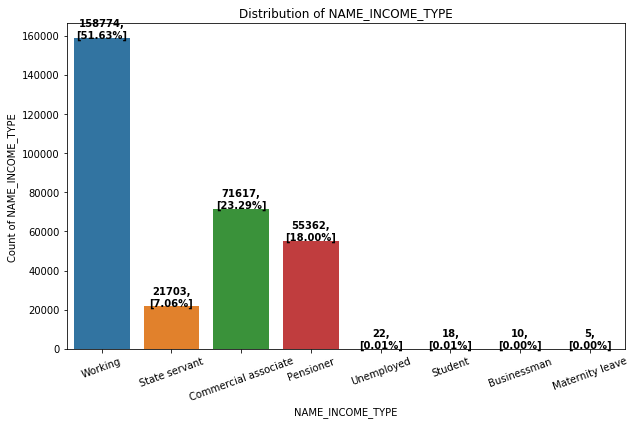

In [117]:
plotDistribution('NAME_INCOME_TYPE',10,6)

51% of data consists of Working type followed by Commercial associtate in Income type

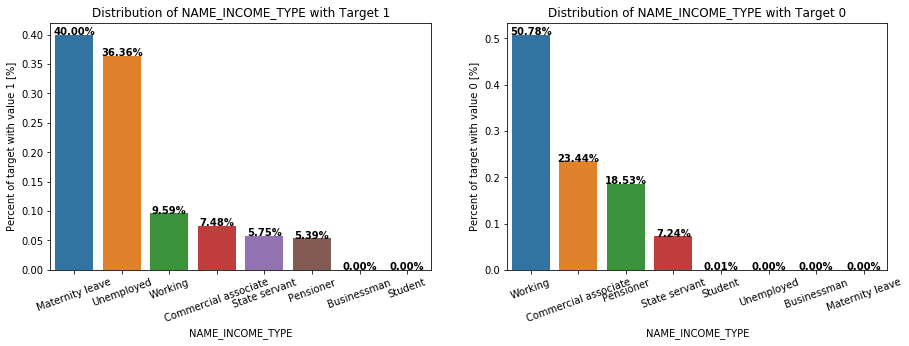

In [118]:
plotcategorical('NAME_INCOME_TYPE',15,10)

Even Though from Graph People with income type as Maternity leave & Unemployed are very high but their contribution is very less in data.Working income type has 9.59% of defaulter whose contribution in data is significantly large.

### 5.14.2 Family Status of Applicant's in terms of loan is repayed or not in %

In [119]:
plotDistribution('NAME_FAMILY_STATUS',12,5)

Married is having highest data in family status followed by single.

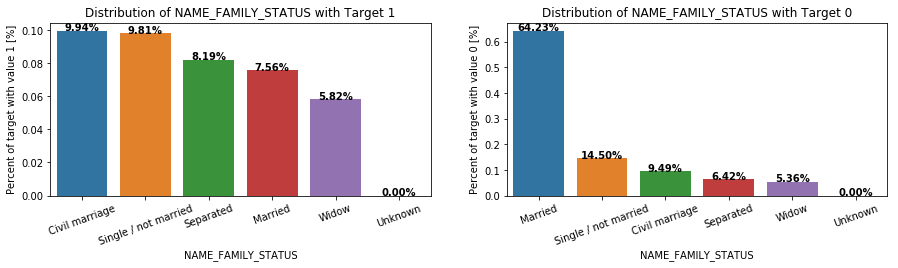

In [120]:
plotcategorical('NAME_FAMILY_STATUS',15,7)

Civil marriage is having 3rd highest in data contribution & highest in defaulter.

### 5.14.3 Occupation of Applicant's in terms of loan is repayed or not in %

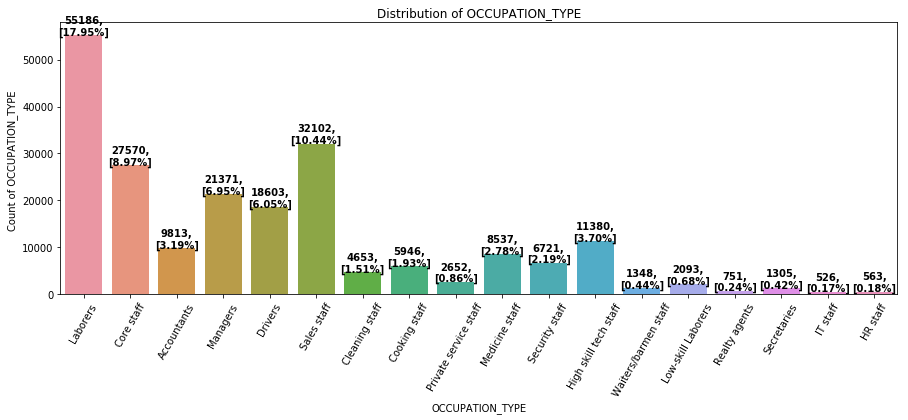

In [121]:
plotDistribution('OCCUPATION_TYPE',15,5,True,60)

Laboreres are at top followed by sales staff in data for occupation type

<Figure size 864x432 with 0 Axes>

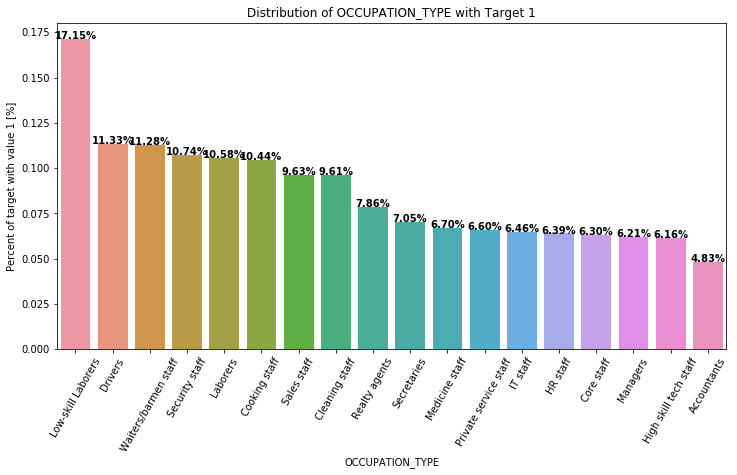

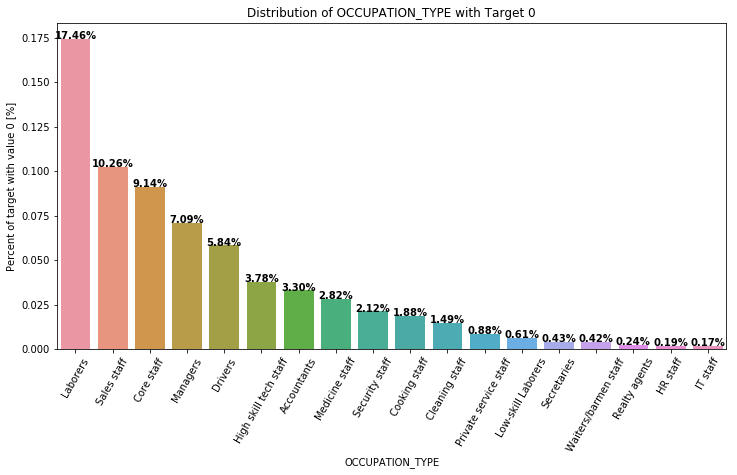

In [122]:
plotcategorical('OCCUPATION_TYPE',12,6,True,60)

Low skill laboreres are highest defaulter for occupation type

## 5.14.4 Education of Applicant's in terms of loan is repayed or not in %

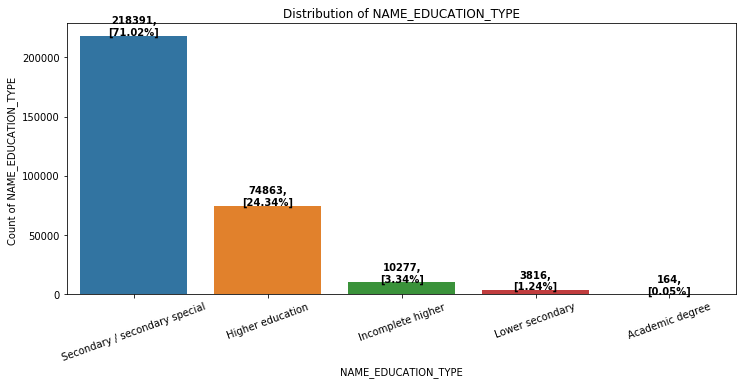

In [123]:
plotDistribution('NAME_EDUCATION_TYPE',12,5)

Secondary/secondary special is having highest contribution of 71% in data for education type

In [124]:
plotcategorical('NAME_EDUCATION_TYPE',15,10)

Lower secondary is having highest defaulter followed by secondary/secondary special which is having highest in data contribution.

### 5.14.5 For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %

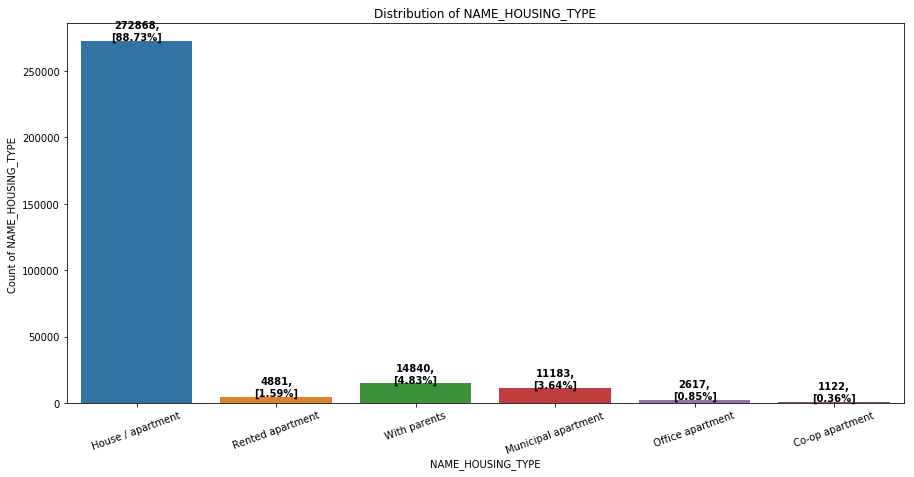

In [125]:
plotDistribution('NAME_HOUSING_TYPE',15,7)

In [126]:
plotcategorical('NAME_HOUSING_TYPE',15,10)

## 5.14.6 Types of Organizations in terms of loan is repayed or not in %¶

<Figure size 1080x720 with 0 Axes>

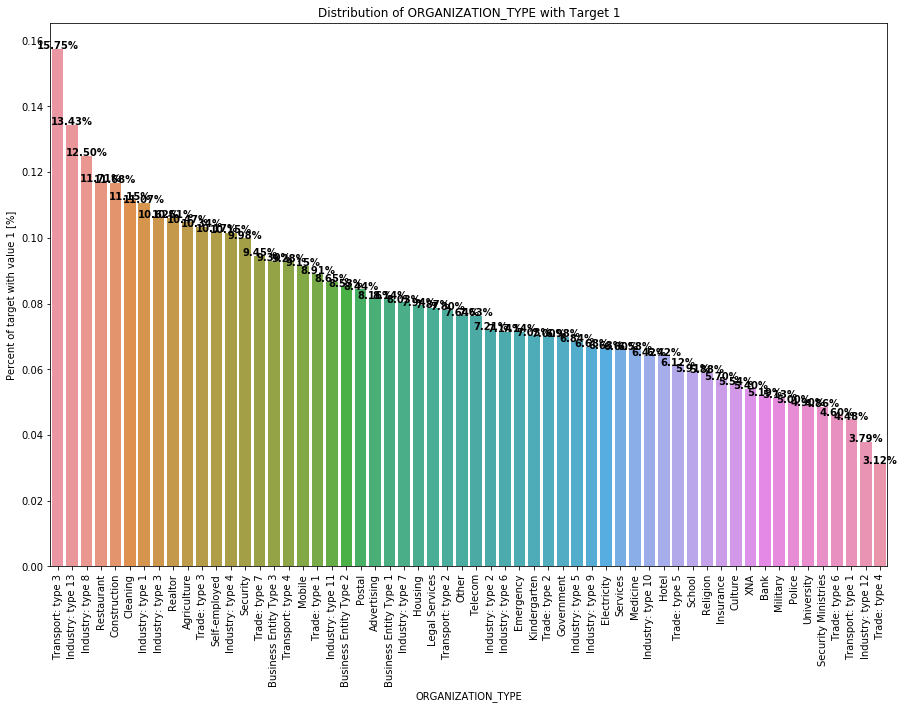

In [127]:
plotcategorical('ORGANIZATION_TYPE',15,10,True,90)

## 5.14.7 Distribution of Name of type of the Suite in terms of loan is repayed or not in %

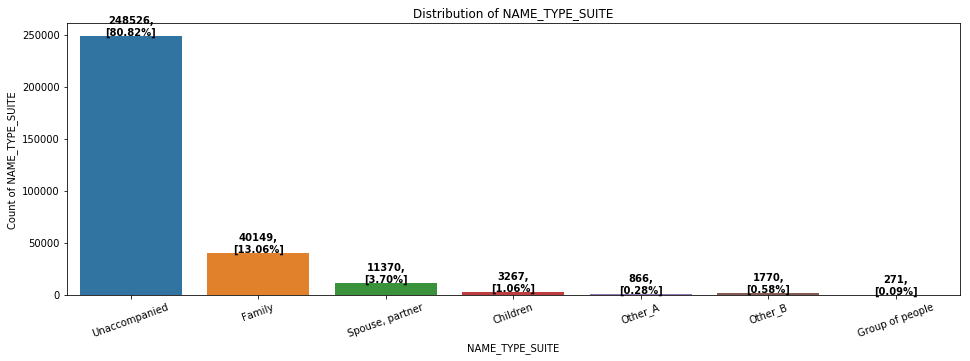

In [128]:
plotDistribution('NAME_TYPE_SUITE',16,5)

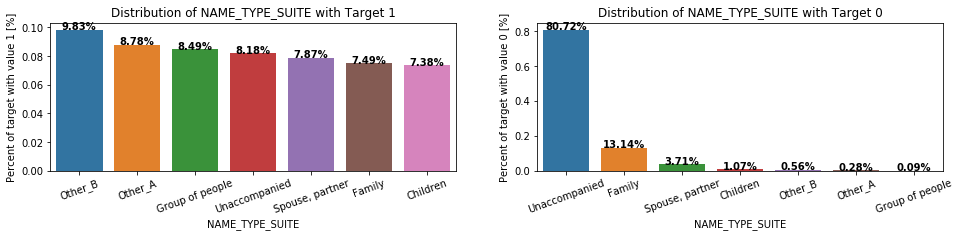

In [129]:
plotcategorical('NAME_TYPE_SUITE',16,6)

## 5.14.8 Distribution of Contract type in terms of loan is repayed or not in %

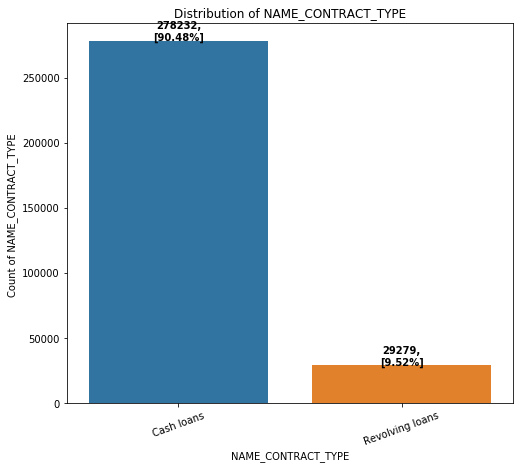

In [130]:
plotDistribution('NAME_CONTRACT_TYPE',8,7)

90% contribution to dataset is by cash loans.

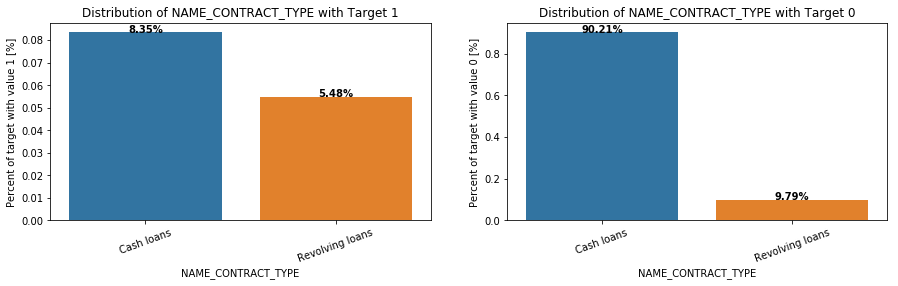

In [131]:
plotcategorical('NAME_CONTRACT_TYPE',15,8)

Contract type cash loans is having very high % of replaying loan

## 5.14.9 Distribution of Gender type in terms of loan is repayed or not in %




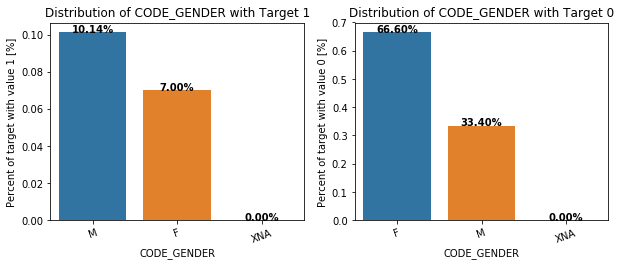

In [132]:
plotcategorical('CODE_GENDER',10,8)

Male are more defaulter than Female

## 5.14.10 Distribution based on clinet owns a car, in terms of loan is repayed or not in %


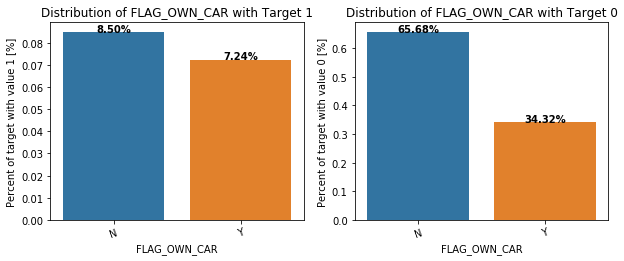

In [133]:
plotcategorical('FLAG_OWN_CAR',10,8)

## 5.14.11 Distribution based on client owns reality, in terms of loan is repayed or not in %


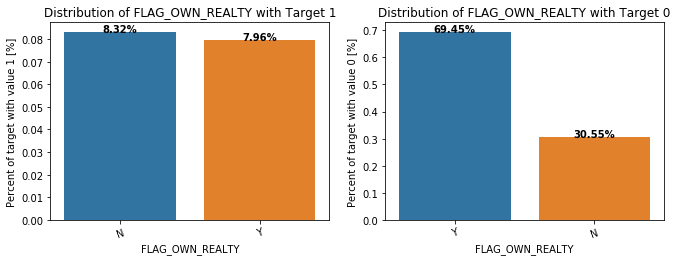

In [134]:
plotcategorical('FLAG_OWN_REALTY',11,8)

## 5.14.11 Distribution based on CNT_CHILDREN, in terms of loan is repayed or not in %


<Figure size 1080x360 with 0 Axes>

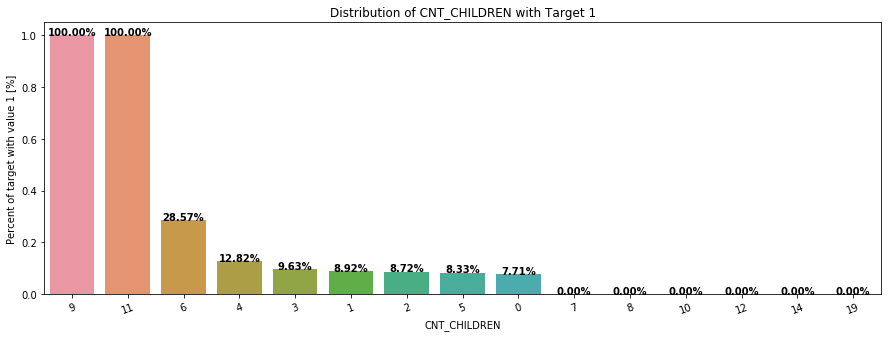

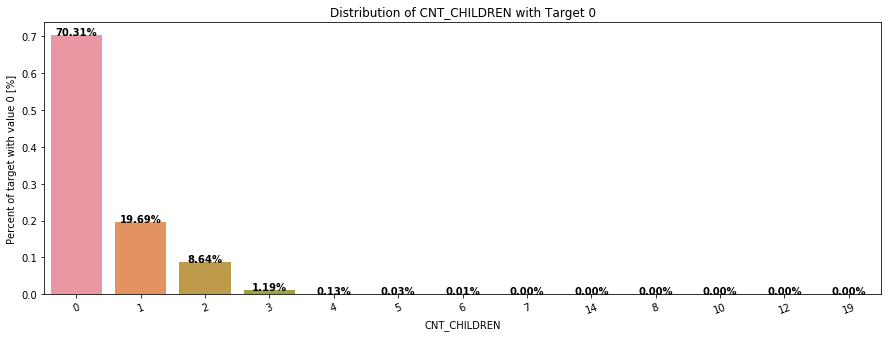

In [135]:
plotcategorical('CNT_CHILDREN',15,5,True)

Thre is high probability of deault when there is more than 6 children and chance of repaying loan is more when there 2 or less children.

## 5.14.11 Distribution based on CNT_FAM_MEMBERS, in terms of loan is repayed or not in %


<Figure size 1152x360 with 0 Axes>

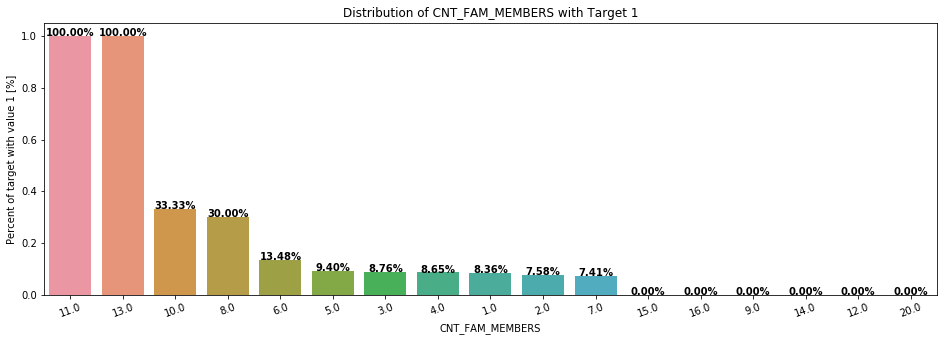

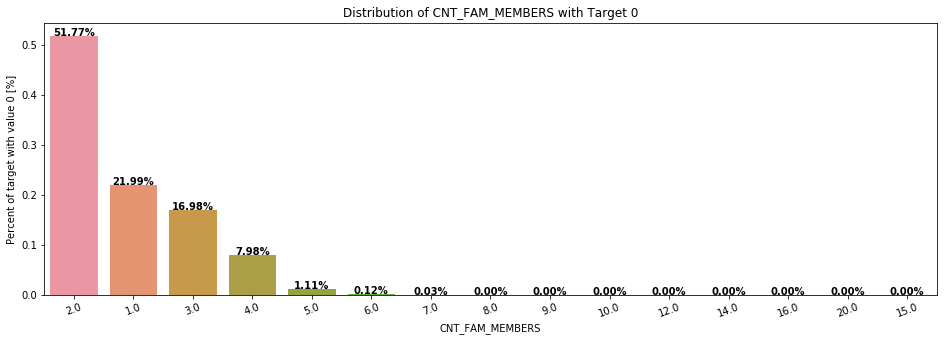

In [136]:
plotcategorical('CNT_FAM_MEMBERS',16,5,True)

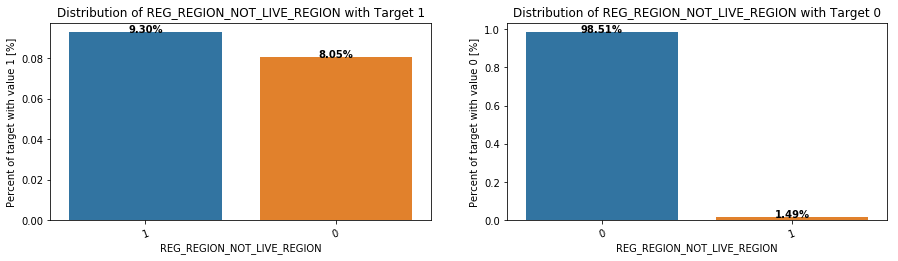

In [137]:
plotcategorical('REG_REGION_NOT_LIVE_REGION',15,8)

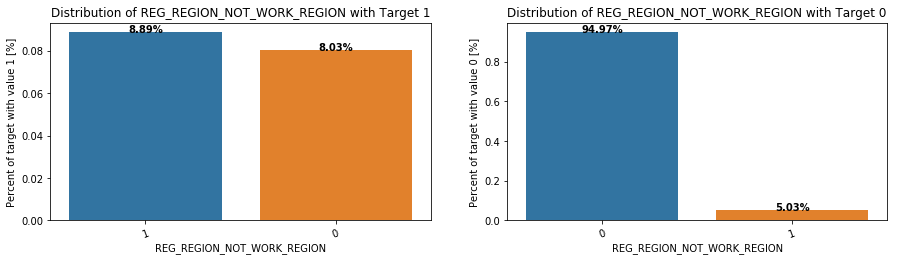

In [138]:
plotcategorical('REG_REGION_NOT_WORK_REGION',15,8)


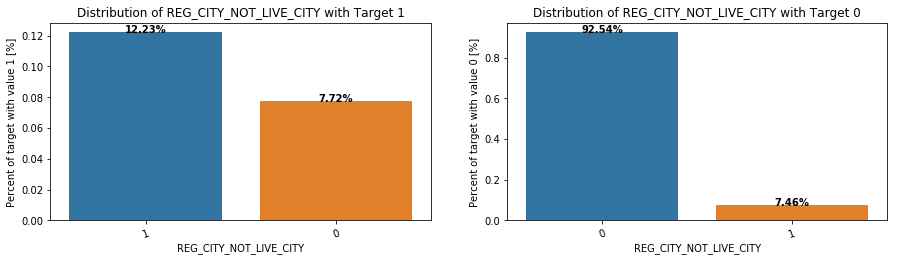

In [139]:
plotcategorical('REG_CITY_NOT_LIVE_CITY',15,8)


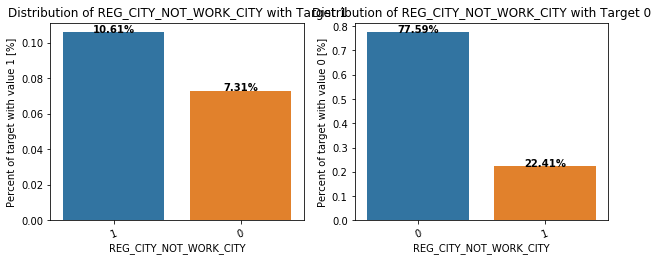

In [140]:
plotcategorical('REG_CITY_NOT_WORK_CITY',10,8)

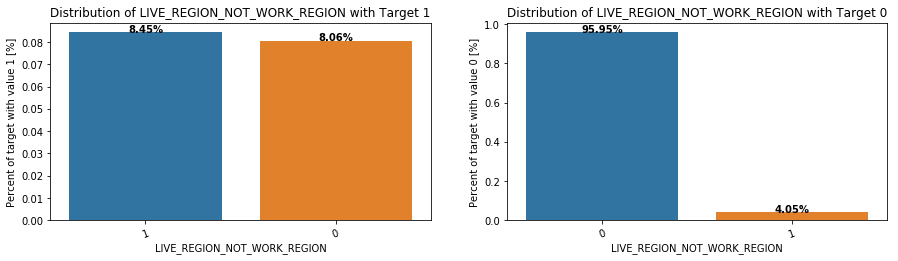

In [141]:
plotcategorical('LIVE_REGION_NOT_WORK_REGION',15,8)

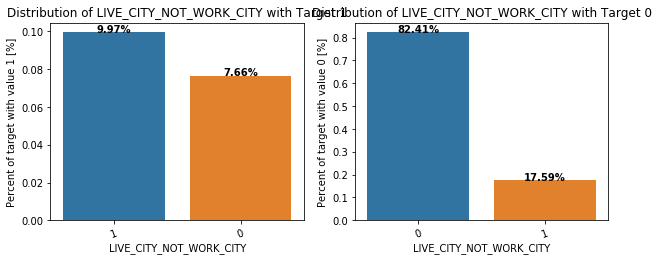

In [142]:
plotcategorical('LIVE_CITY_NOT_WORK_CITY',10,8)

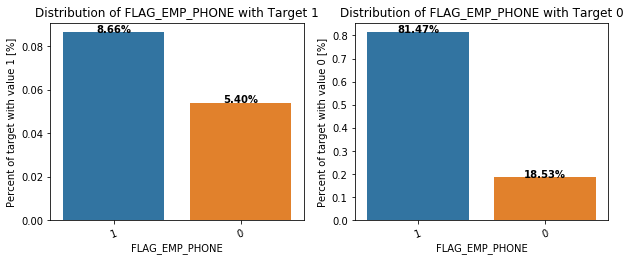

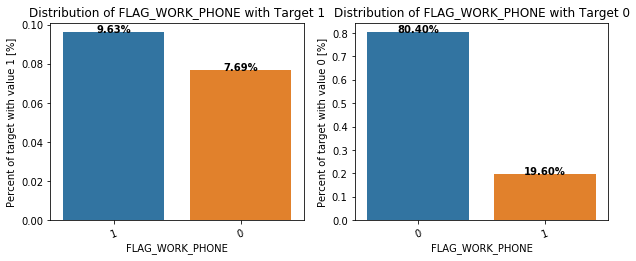

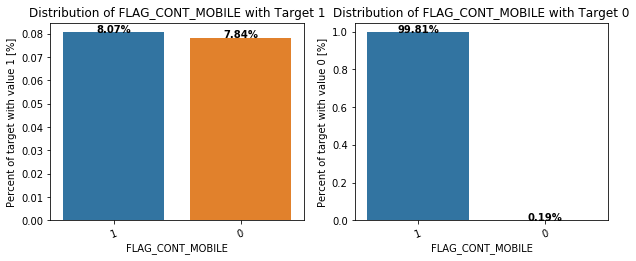

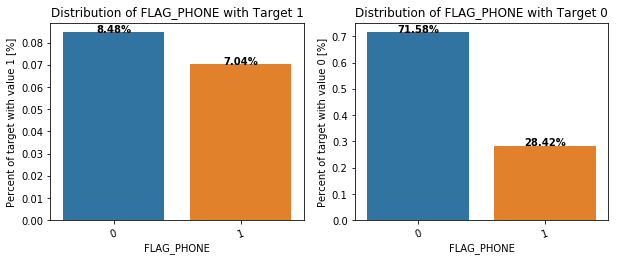

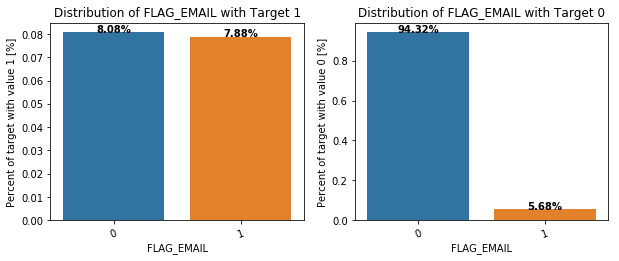

In [143]:
plotcategorical('FLAG_MOBIL',10,8)
plotcategorical('FLAG_EMP_PHONE',10,8)
plotcategorical('FLAG_WORK_PHONE',10,8)
plotcategorical('FLAG_CONT_MOBILE',10,8)
plotcategorical('FLAG_PHONE',10,8)
plotcategorical('FLAG_EMAIL',10,8)


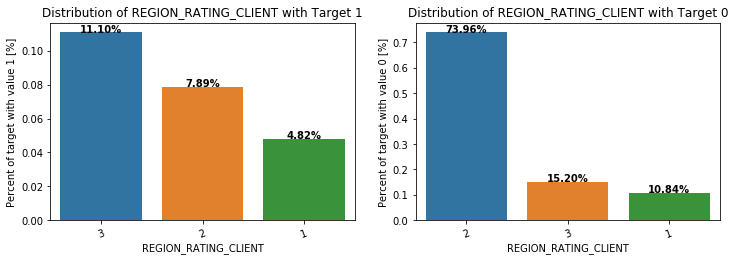

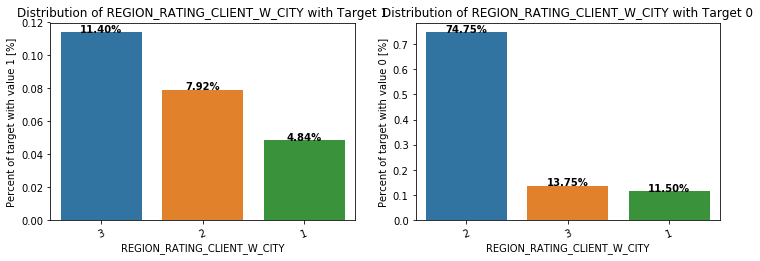

In [144]:
plotcategorical('REGION_RATING_CLIENT',12,8)
plotcategorical('REGION_RATING_CLIENT_W_CITY',12,8)


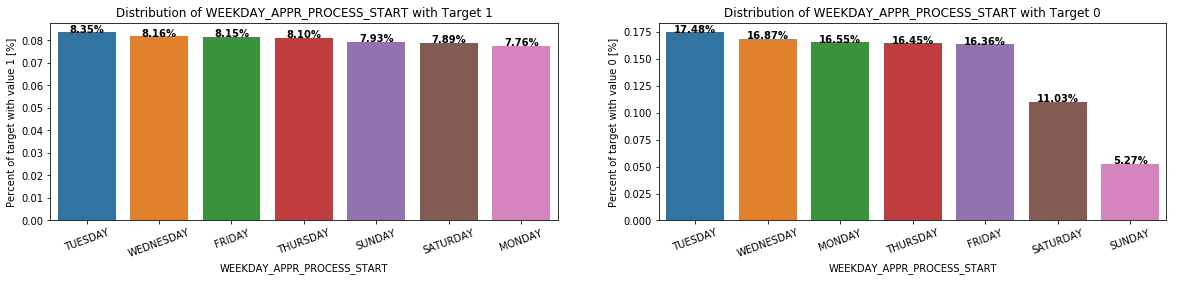

In [145]:
plotcategorical('WEEKDAY_APPR_PROCESS_START',20,8)


<Figure size 1440x576 with 0 Axes>

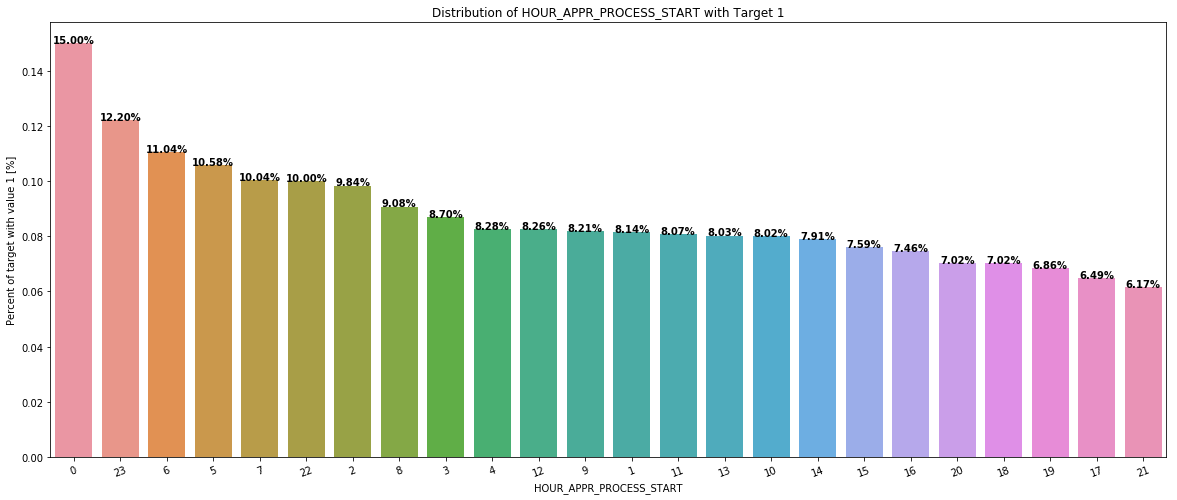

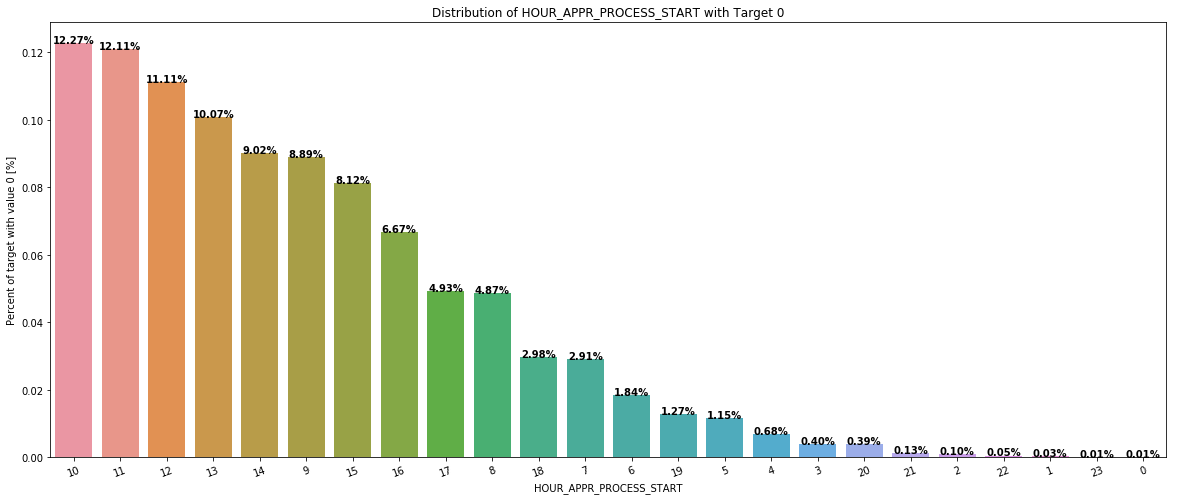

In [146]:
plotcategorical('HOUR_APPR_PROCESS_START',20,8,True)

## 5.Read previous application data

In [147]:
prev_appData=pd.read_csv('previous_application.csv')
prev_appData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [148]:
prev_appData.shape,application_data.shape

((1670214, 37), (307511, 83))

### 5.1.Merge Previous application data and application data

In [149]:
merged_df = pd.merge(application_data, prev_appData, how = 'inner', on= 'SK_ID_CURR')

In [150]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [151]:
merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

In [152]:
Approved=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Approved']
Canceled=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Canceled']
Refused=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Refused']
Unused_offer=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Unused offer']

In [153]:
def plotcategorical_merged(feature,fig_length,fig_width,IsfigSize_big=False,rotation=20):
    plt.figure(figsize=(fig_length,fig_width))
    Rotate=20
    if IsfigSize_big:
        Rotate=rotation
    
    if IsfigSize_big:
        plt.figure(figsize=(fig_length,fig_width))
    else:
        plt.subplot(121)
    cat_perc = Approved[[feature, 'NAME_CONTRACT_STATUS']].groupby([feature],as_index=False).count()
    cat_perc['NAME_CONTRACT_STATUS']=cat_perc['NAME_CONTRACT_STATUS']/len(Approved.index)
    cat_perc.sort_values(by='NAME_CONTRACT_STATUS', ascending=False, inplace=True)
    ax1=sns.barplot(x = feature, y='NAME_CONTRACT_STATUS', order=cat_perc[feature], data=cat_perc)
    for p in ax1.patches:
        height = p.get_height()
            #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax1.text(p.get_x()+p.get_width()/2,height,'{:1.2f}%'.format(height*100),
            ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Percent of Approved in[%]')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {} with Approved Status'.format(feature))
    
    if IsfigSize_big:
        plt.figure(figsize=(fig_length,fig_width))
    else:
        plt.subplot(122)
    cat_perc = Canceled[[feature, 'NAME_CONTRACT_STATUS']].groupby([feature],as_index=False).count()
    cat_perc['NAME_CONTRACT_STATUS']=cat_perc['NAME_CONTRACT_STATUS']/len(Approved.index)
    cat_perc.sort_values(by='NAME_CONTRACT_STATUS', ascending=False, inplace=True)
    ax2=sns.barplot(x = feature, y='NAME_CONTRACT_STATUS', order=cat_perc[feature], data=cat_perc)
    for p in ax2.patches:
        height = p.get_height()
            #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax2.text(p.get_x()+p.get_width()/2,height,'{:1.2f}%'.format(height*100),
            ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Percent of Canceled in[%]')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {} with Canceled Status'.format(feature))

    plt.figure(figsize=(fig_length,fig_width))
    if IsfigSize_big:
        plt.figure(figsize=(fig_length,fig_width))
    else:
        plt.subplot(121)
    cat_perc = Refused[[feature, 'NAME_CONTRACT_STATUS']].groupby([feature],as_index=False).count()
    cat_perc['NAME_CONTRACT_STATUS']=cat_perc['NAME_CONTRACT_STATUS']/len(Approved.index)
    cat_perc.sort_values(by='NAME_CONTRACT_STATUS', ascending=False, inplace=True)
    ax3=sns.barplot(x = feature, y='NAME_CONTRACT_STATUS', order=cat_perc[feature], data=cat_perc)
    for p in ax3.patches:
        height = p.get_height()
            #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax3.text(p.get_x()+p.get_width()/2,height,'{:1.2f}%'.format(height*100),
            ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Percent of Refused in[%]')
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {} with Refused Status'.format(feature))

    if IsfigSize_big:
        plt.figure(figsize=(fig_length,fig_width))
    else:
        plt.subplot(122)
    cat_perc = Unused_offer[[feature, 'NAME_CONTRACT_STATUS']].groupby([feature],as_index=False).count()
    cat_perc['NAME_CONTRACT_STATUS']=cat_perc['NAME_CONTRACT_STATUS']/len(Approved.index)
    cat_perc.sort_values(by='NAME_CONTRACT_STATUS', ascending=False, inplace=True)
    ax4=sns.barplot(x = feature, y='NAME_CONTRACT_STATUS', order=cat_perc[feature], data=cat_perc)
    for p in ax4.patches:
        height = p.get_height()
            #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax4.text(p.get_x()+p.get_width()/2,height,'{:1.2f}%'.format(height*100),
            ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Percent of Unused_offer in[%]')
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {} with Unused_offer Status'.format(feature))

In [154]:
def plotDistribution_merged(feature,fig_length,fig_width,IsfigSize_big=False,rotation=20):
    Rotate=20
    if IsfigSize_big:
        Rotate=rotation
    plt.figure(figsize=(fig_length,fig_width))
    total = float(len(application_data))
    ax = sns.countplot(x=feature,data=application_data) # for Seaborn version 0.7 and more
    for p in ax.patches:
        height = p.get_height()
        #ax.text(x, y, s)-->Add the text *s* to the axes at location *x*, *y* in data coordinates.
        ax.text(p.get_x()+p.get_width()/2,height+20,'{},\n[{:1.2f}%]'.format(height,height/total*100),
                ha="center",weight = "bold",fontsize=10,rotation=0) 
    plt.ylabel('Count of {} '.format(feature))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=Rotate)
    plt.title('Distribution of {}'.format(feature))


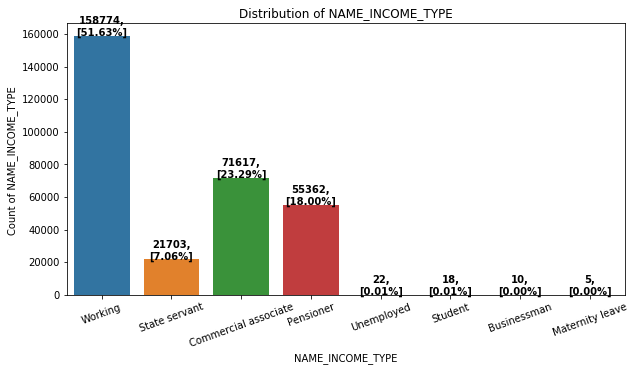

In [155]:
plotDistribution_merged('NAME_INCOME_TYPE',10,5)

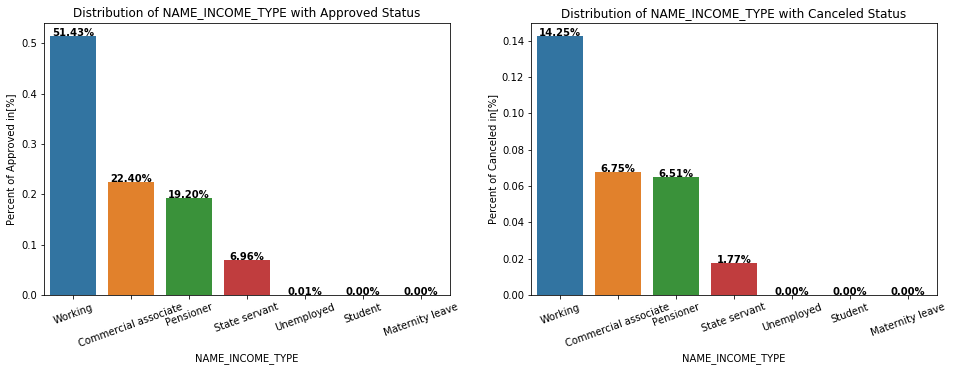

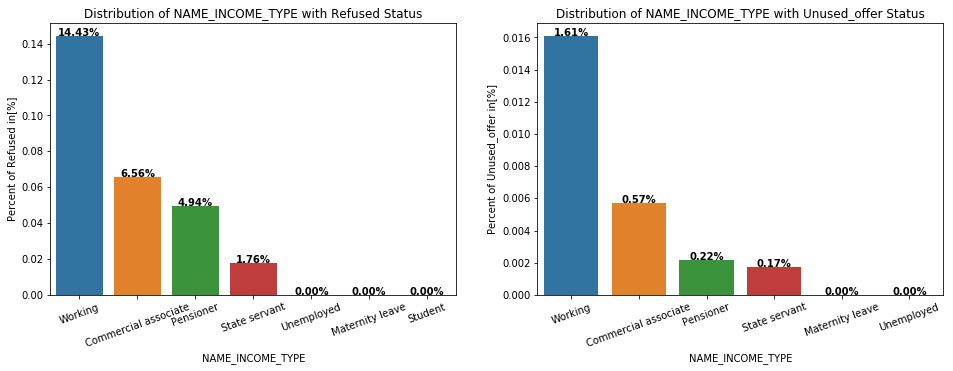

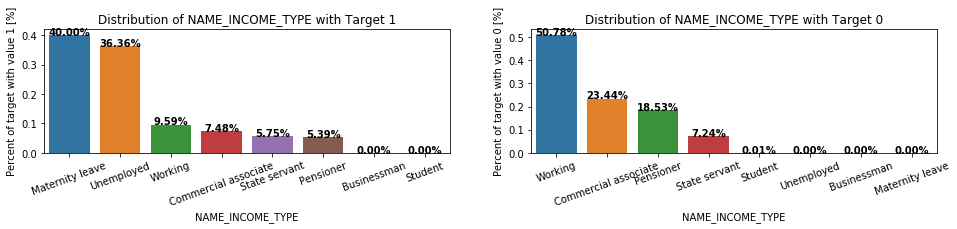

In [156]:
plotcategorical_merged('NAME_INCOME_TYPE',16,5)
plotcategorical('NAME_INCOME_TYPE',16,5)

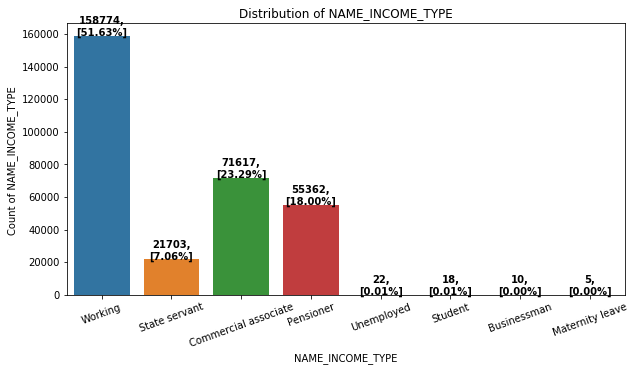

In [157]:
plotDistribution_merged('NAME_INCOME_TYPE',10,5)

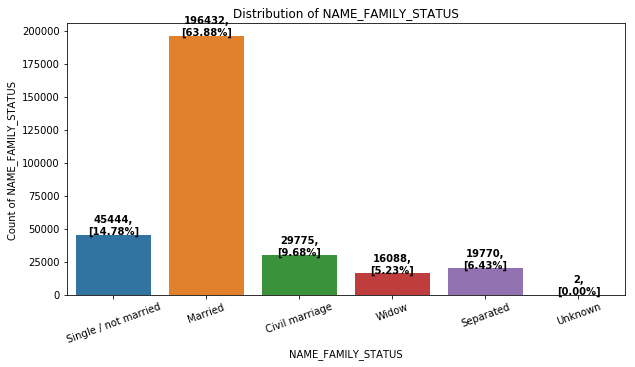

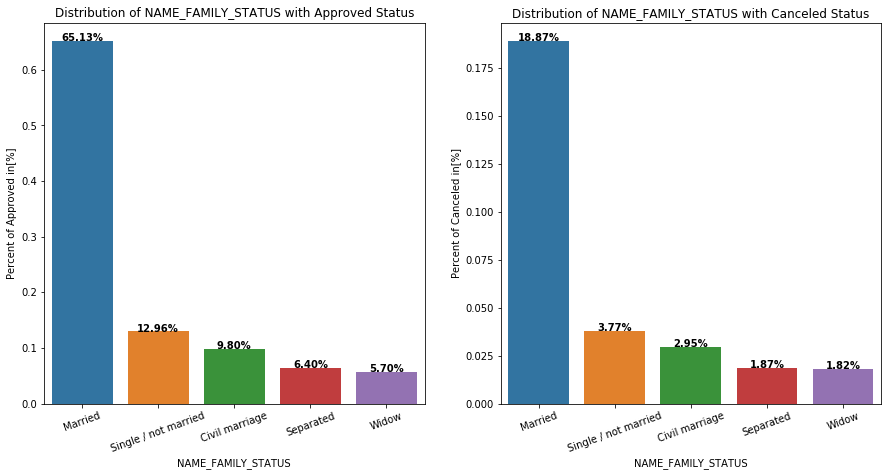

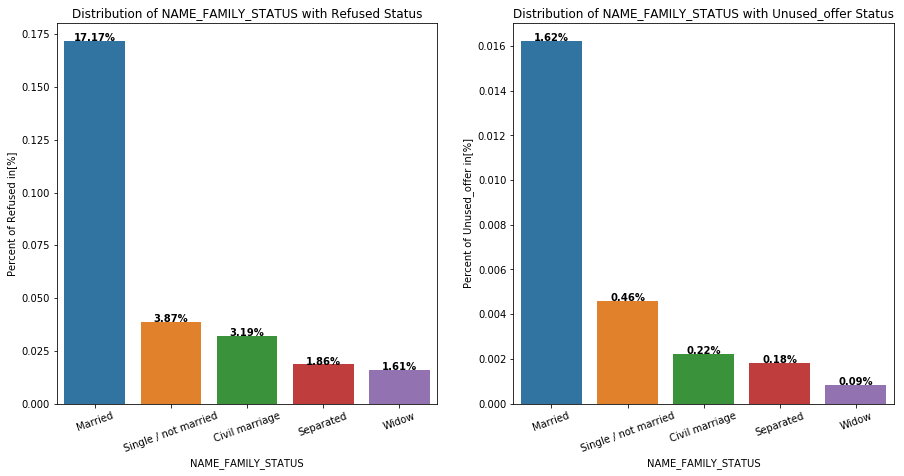

In [158]:
plotDistribution_merged('NAME_FAMILY_STATUS',10,5)
plotcategorical_merged('NAME_FAMILY_STATUS',15,7)

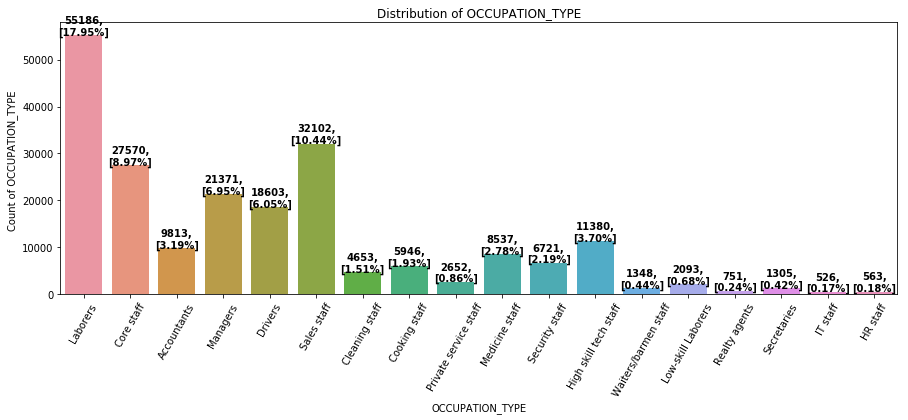

<Figure size 864x432 with 0 Axes>

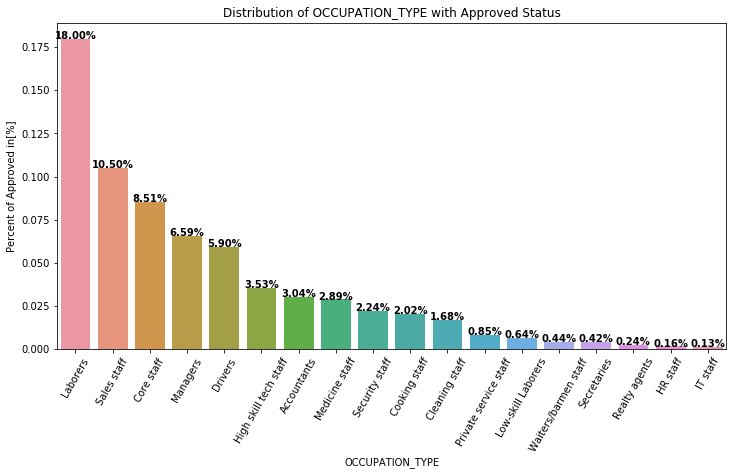

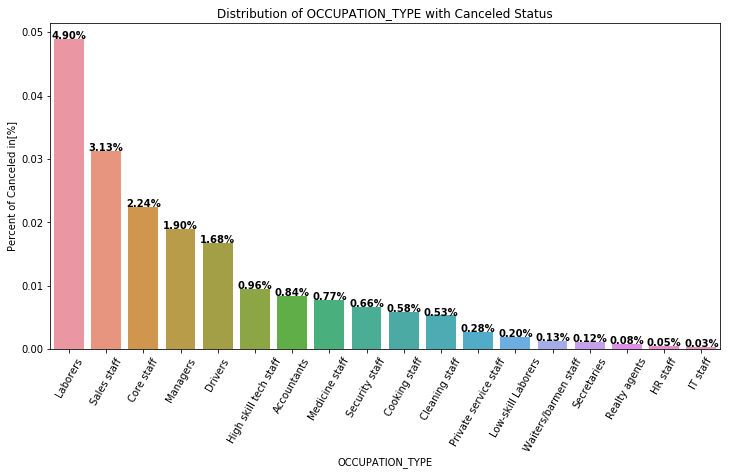

<Figure size 864x432 with 0 Axes>

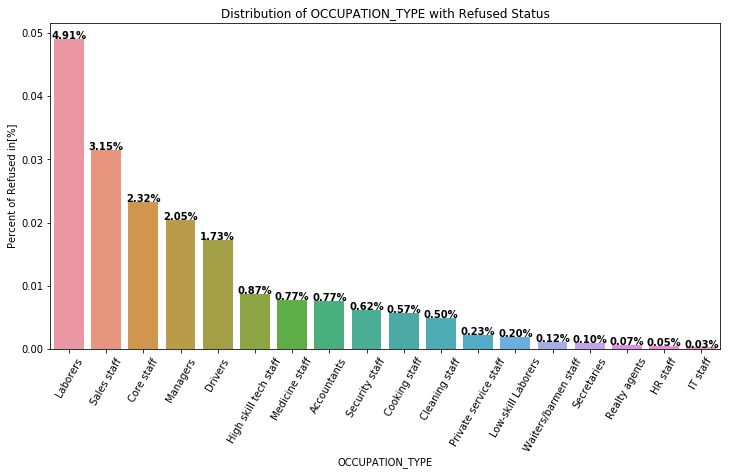

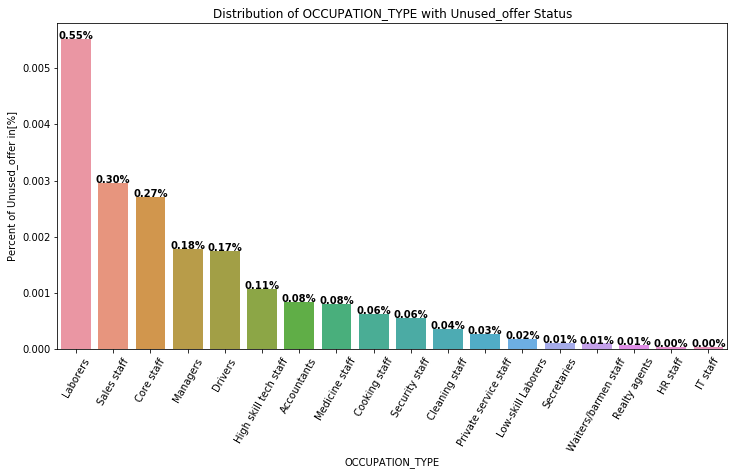

In [159]:
plotDistribution_merged('OCCUPATION_TYPE',15,5,True,60)
plotcategorical_merged('OCCUPATION_TYPE',12,6,True,60)

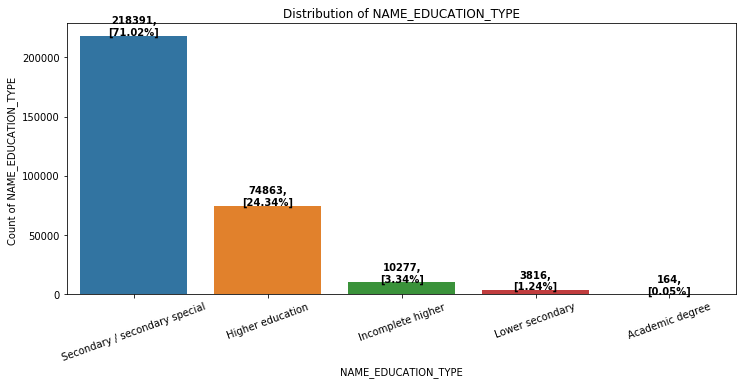

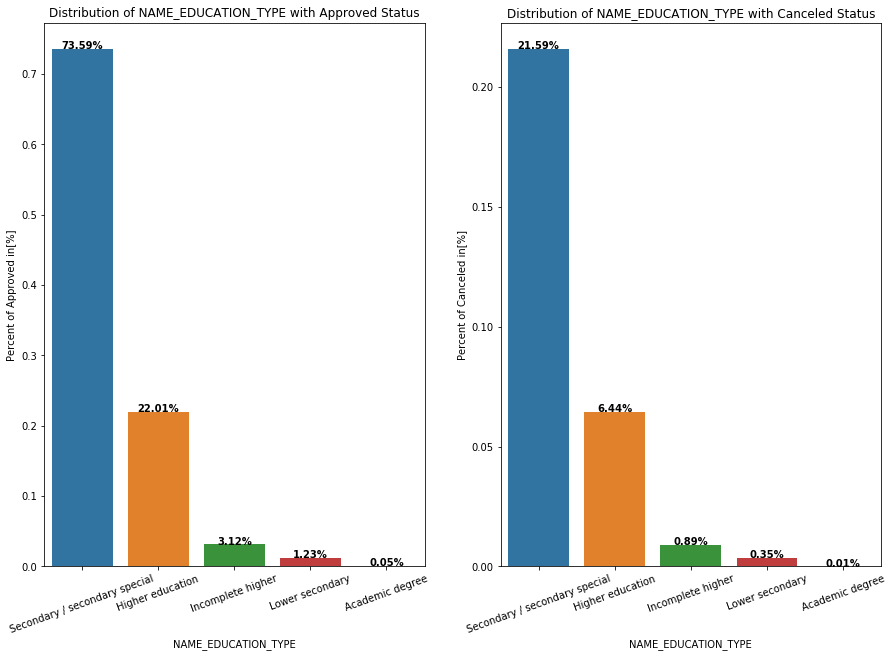

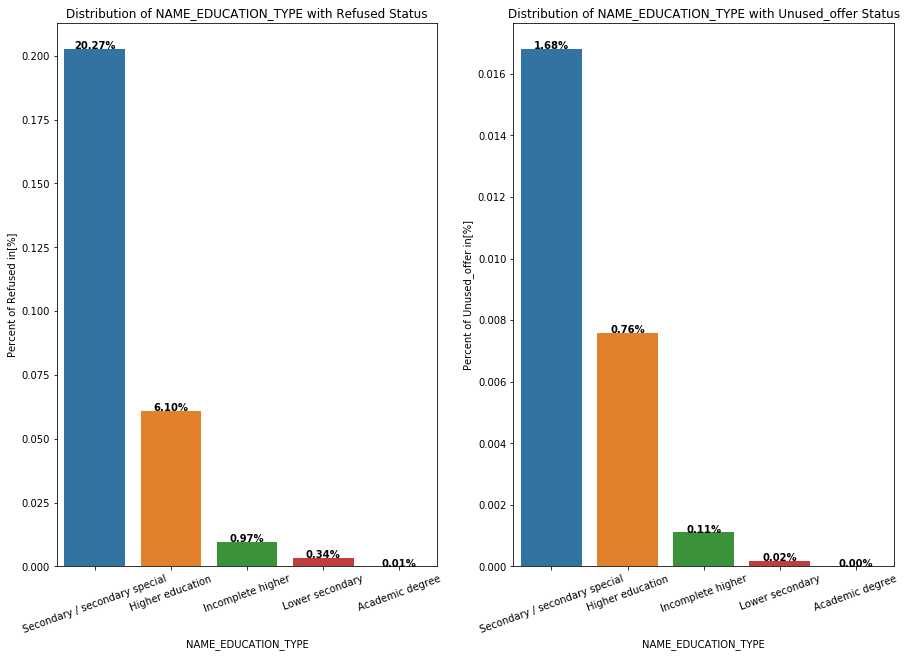

In [160]:
plotDistribution_merged('NAME_EDUCATION_TYPE',12,5)
plotcategorical_merged('NAME_EDUCATION_TYPE',15,10)


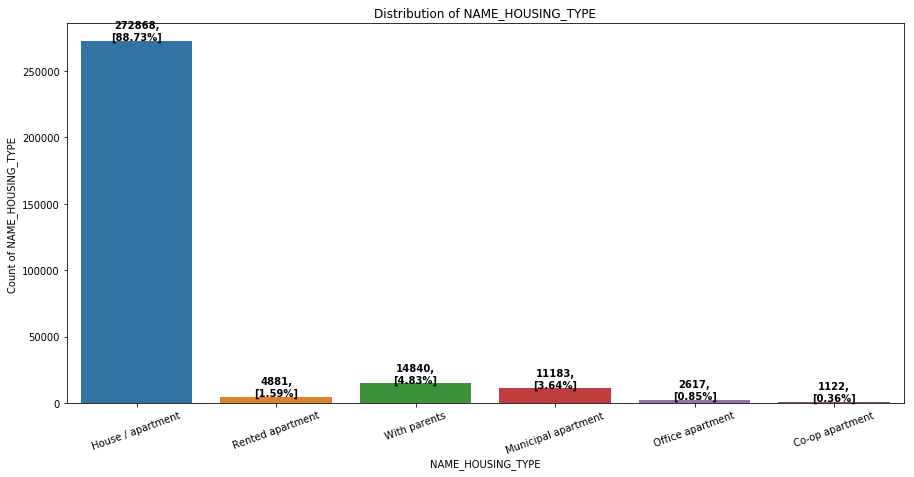

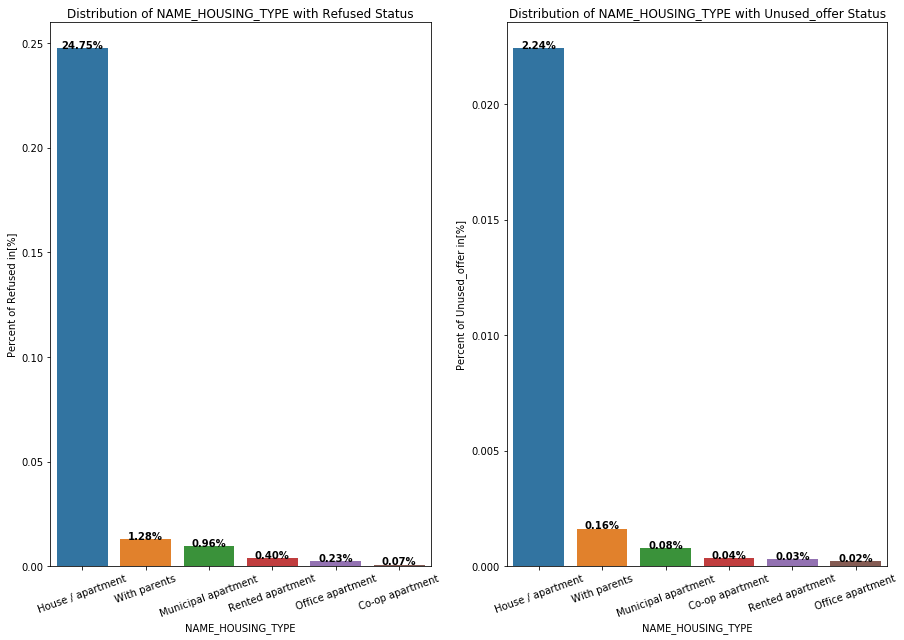

In [161]:
plotDistribution_merged('NAME_HOUSING_TYPE',15,7)
plotcategorical_merged('NAME_HOUSING_TYPE',15,10)


<Figure size 1800x720 with 0 Axes>

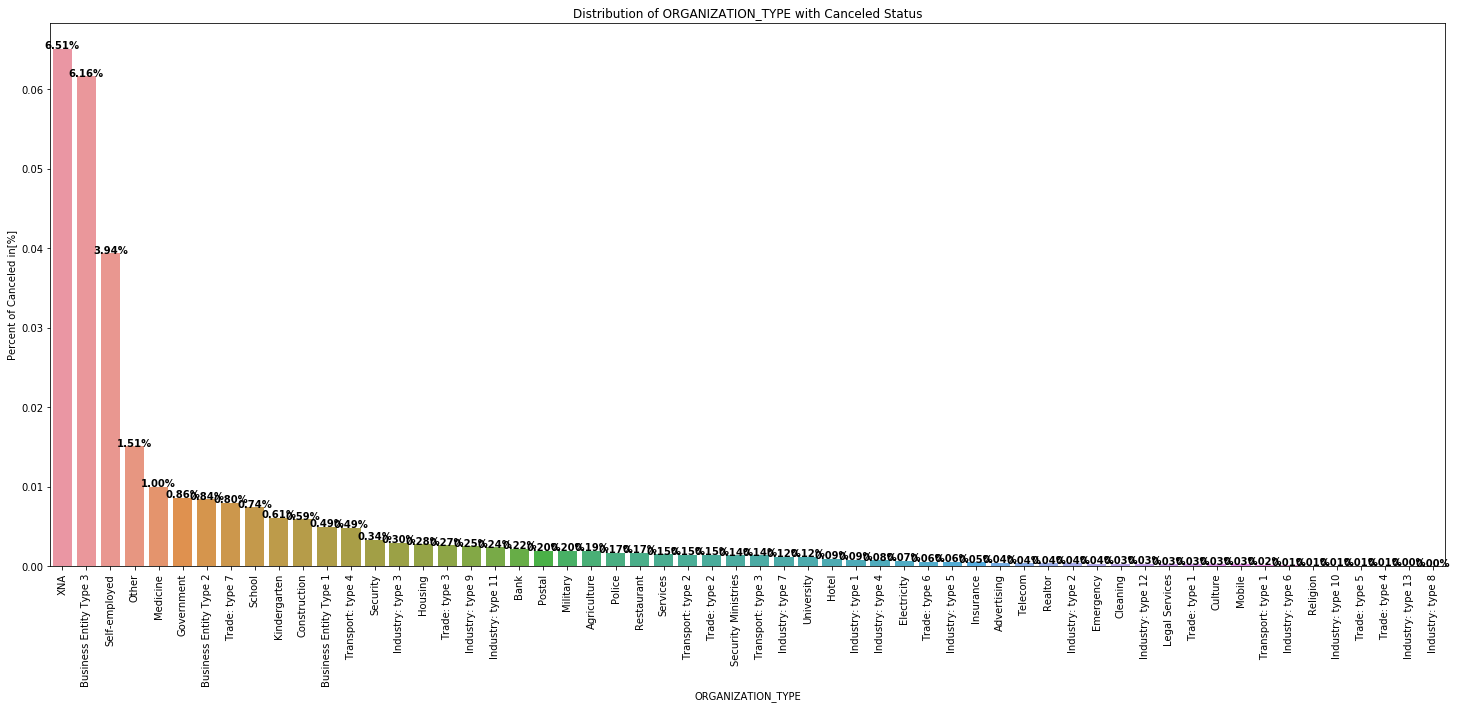

<Figure size 1800x720 with 0 Axes>

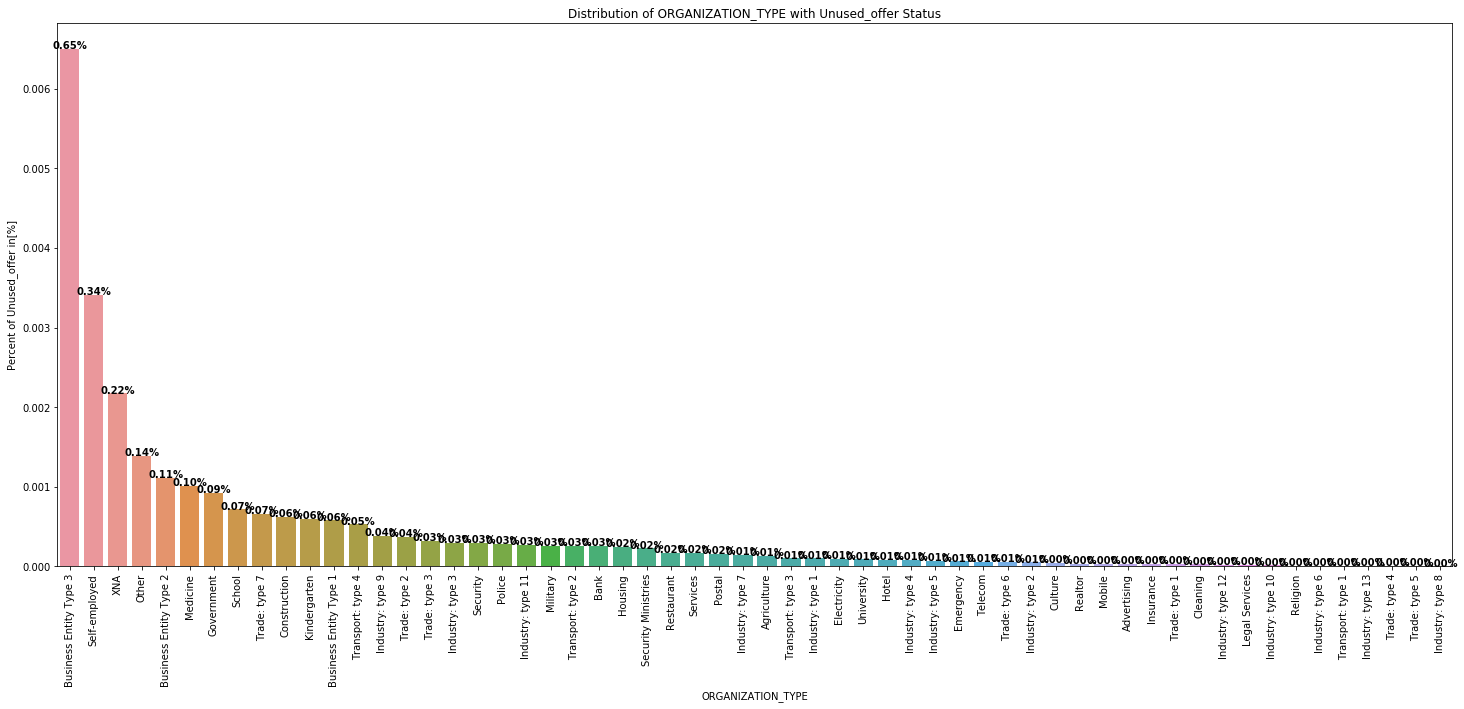

In [162]:
plotcategorical_merged('ORGANIZATION_TYPE',25,10,True,90)

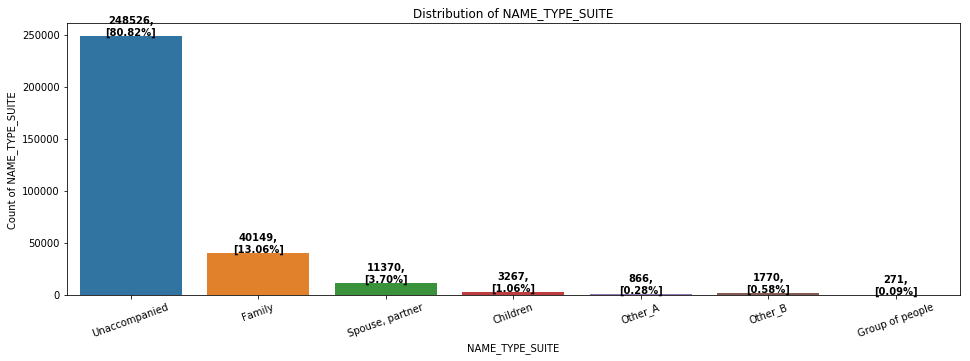

In [163]:
plotDistribution_merged('NAME_TYPE_SUITE',16,5)
# plotcategorical_merged('NAME_TYPE_SUITE',16,6)

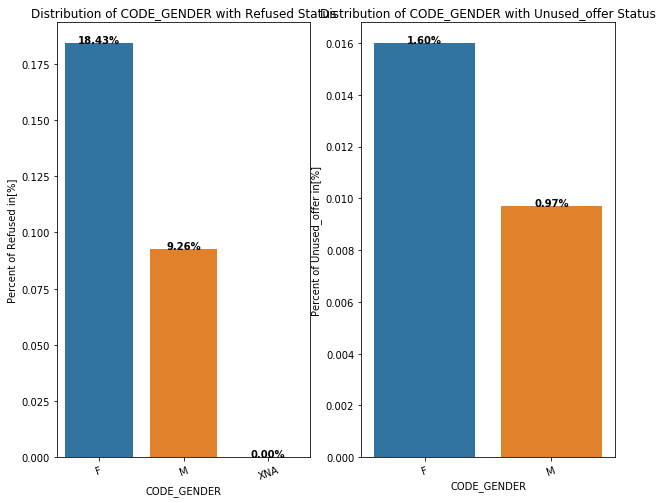

In [164]:
# plotcategorical_merged('NAME_CONTRACT_TYPE',15,8)
plotcategorical_merged('CODE_GENDER',10,8)


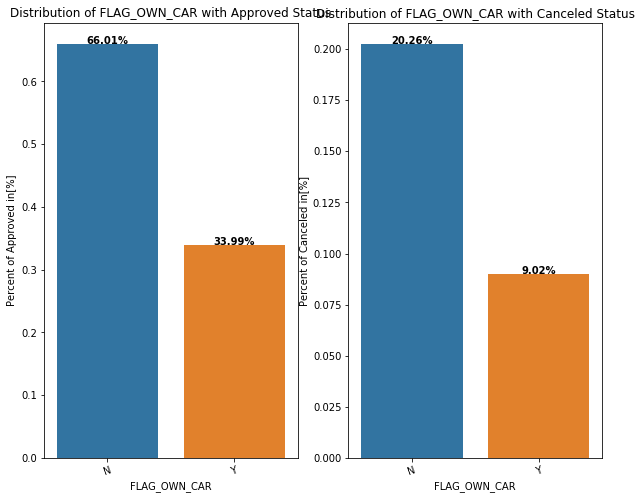

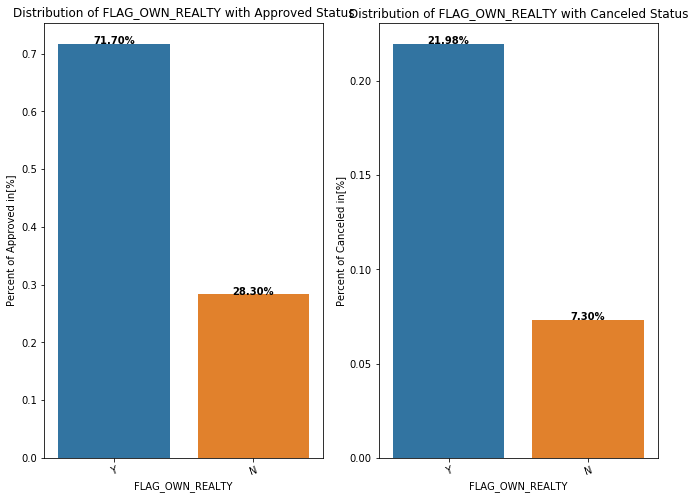

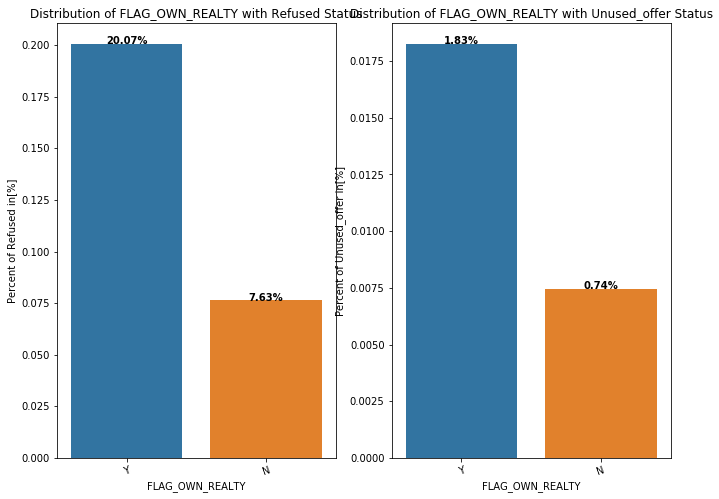

In [165]:
plotcategorical_merged('FLAG_OWN_CAR',10,8)
plotcategorical_merged('FLAG_OWN_REALTY',11,8)


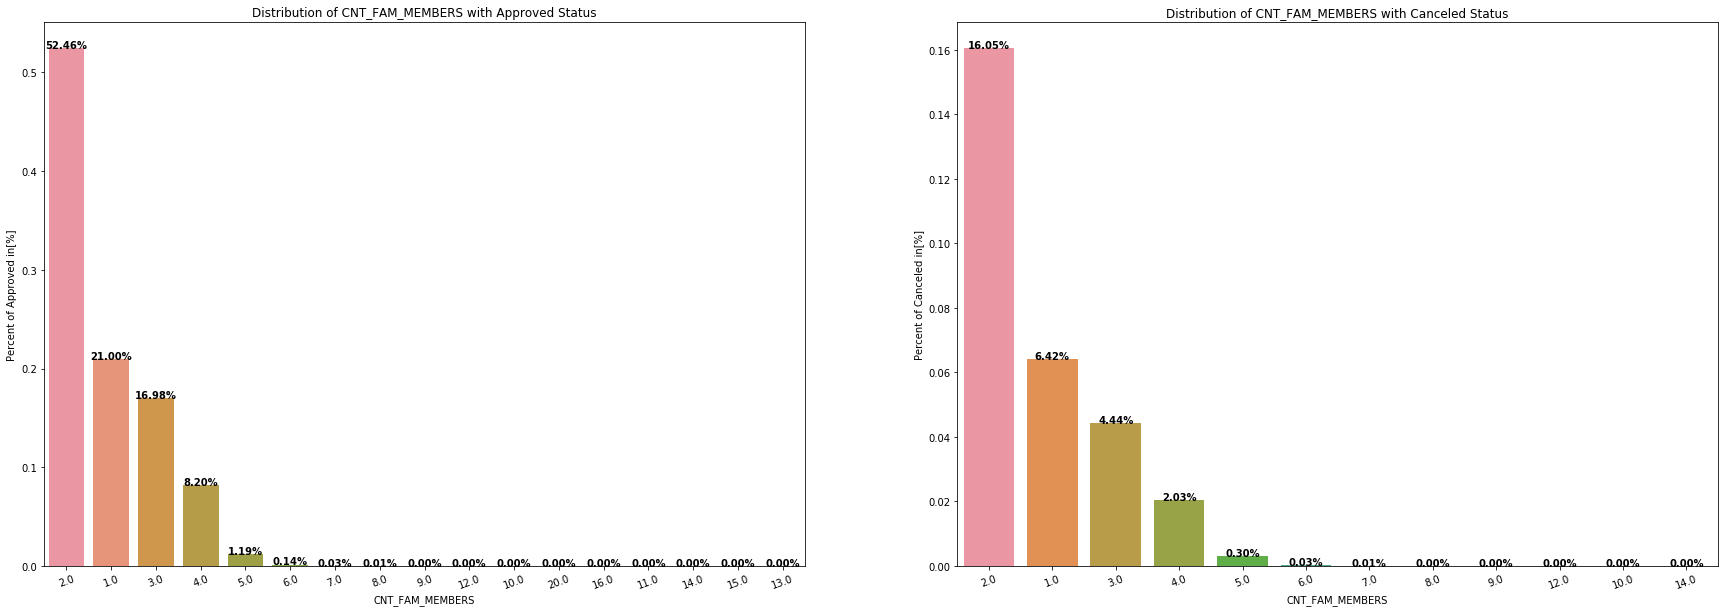

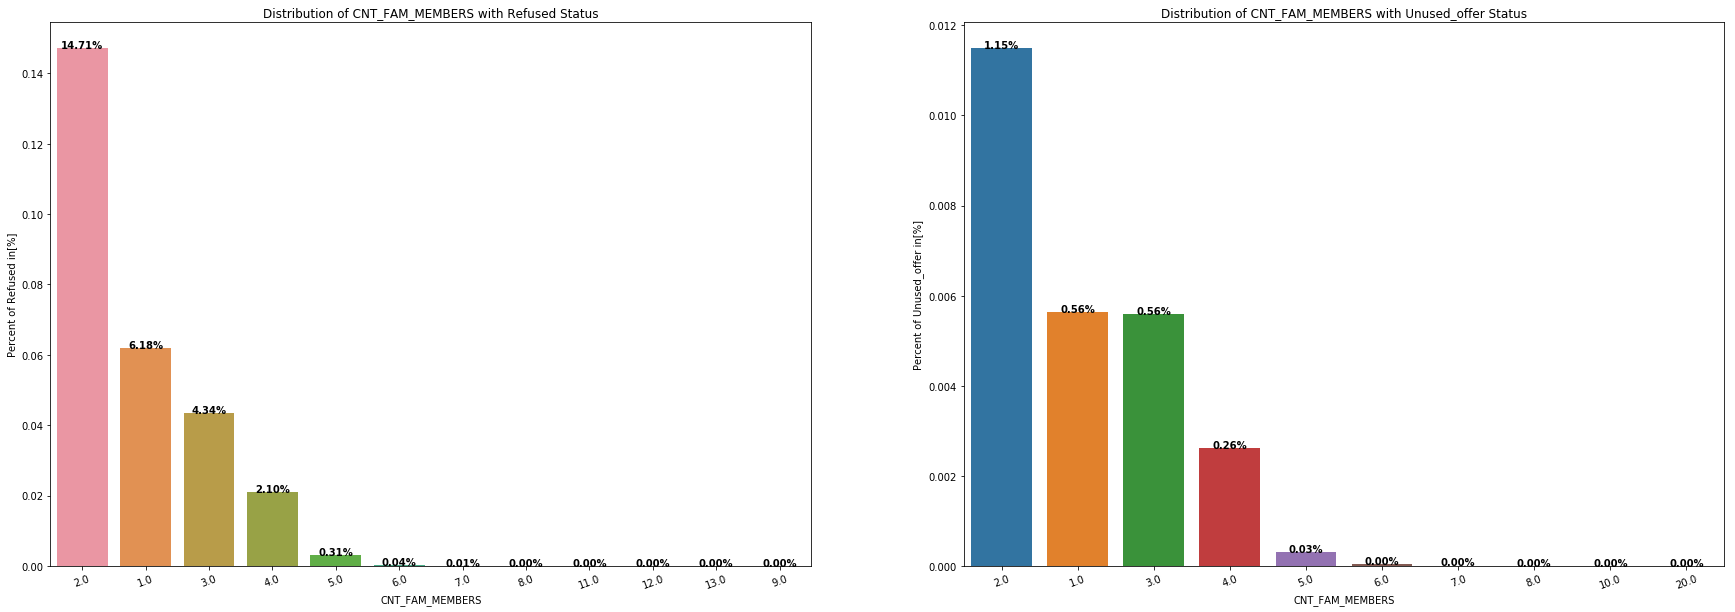

In [166]:
plotcategorical_merged('CNT_CHILDREN',20,10)
plotcategorical_merged('CNT_FAM_MEMBERS',30,10)


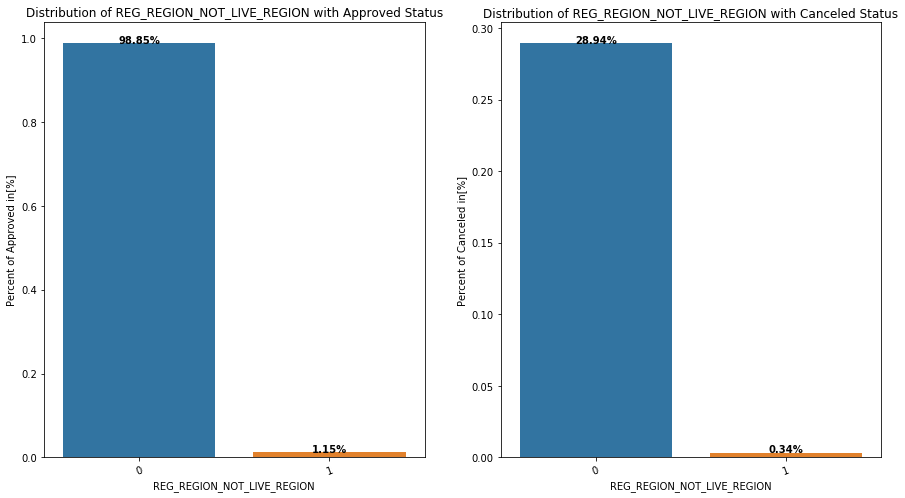

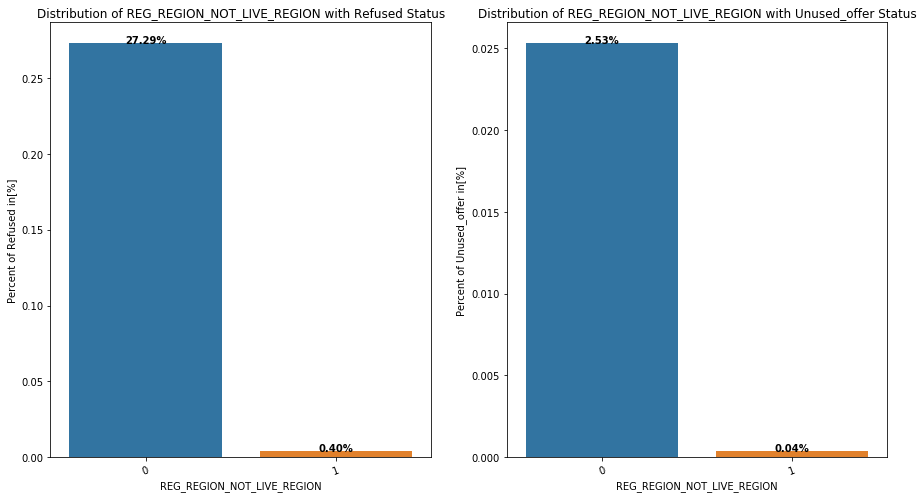

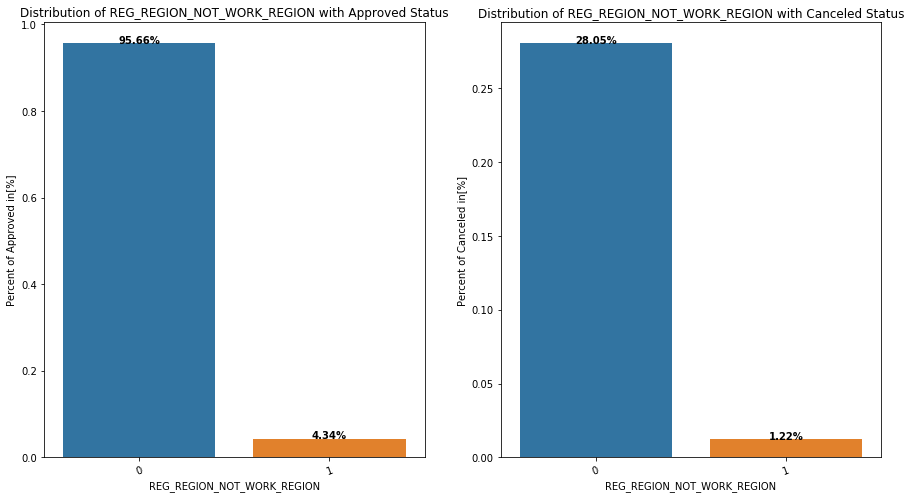

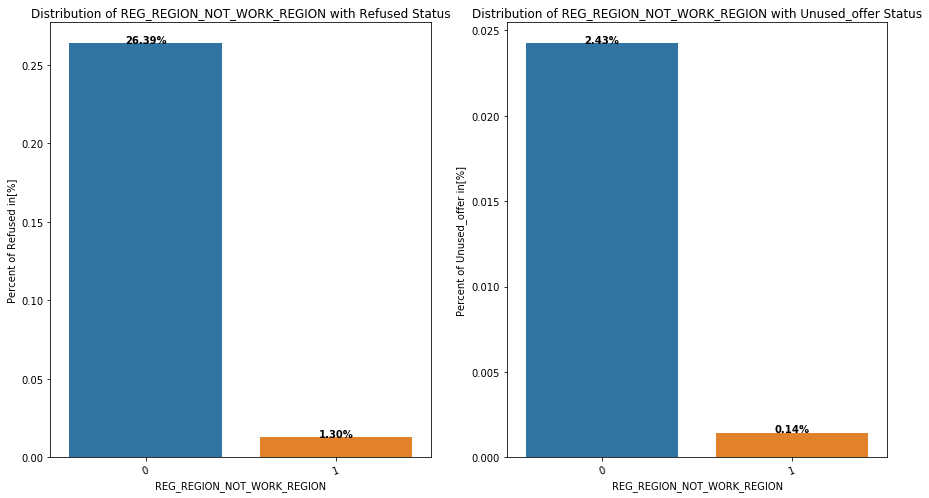

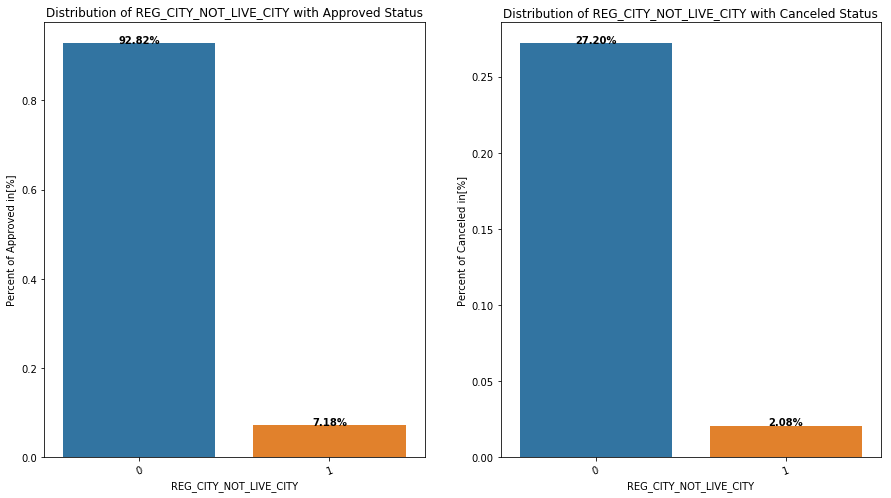

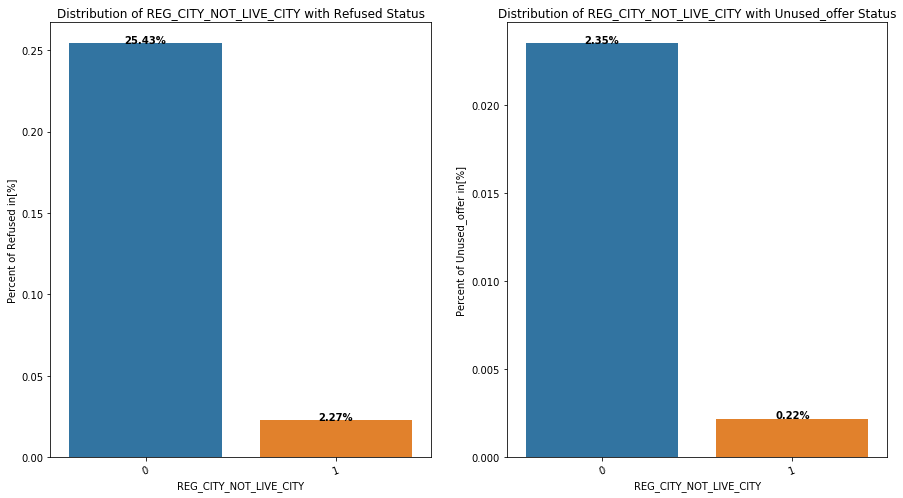

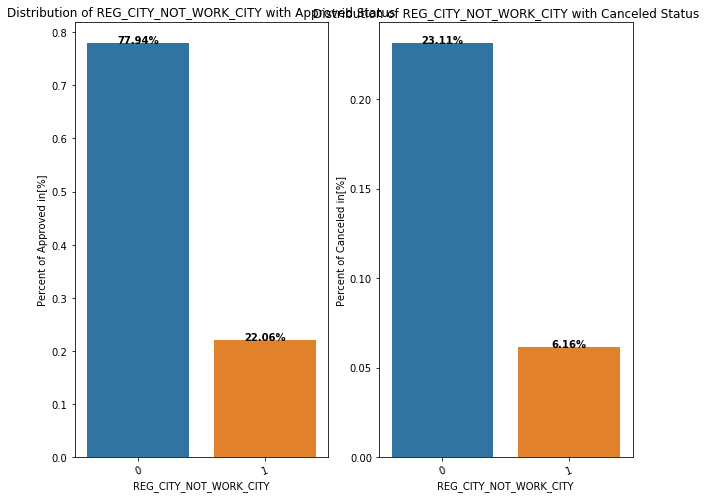

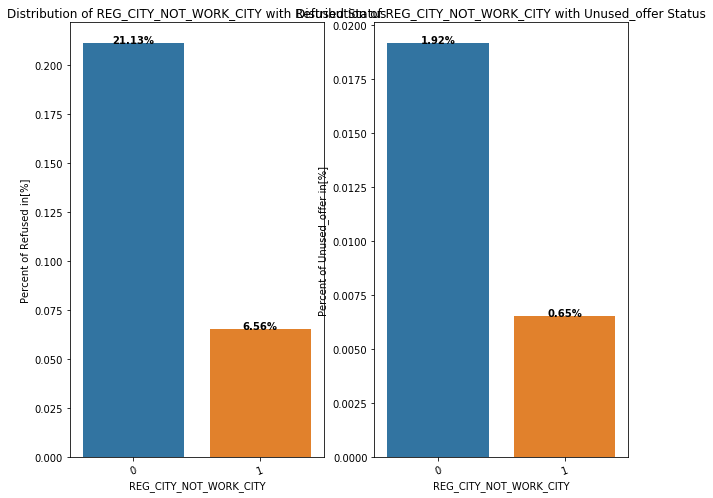

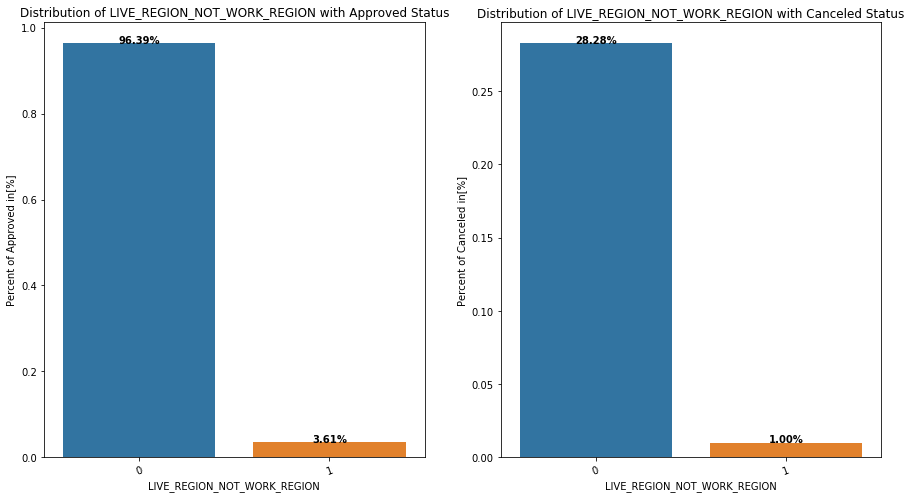

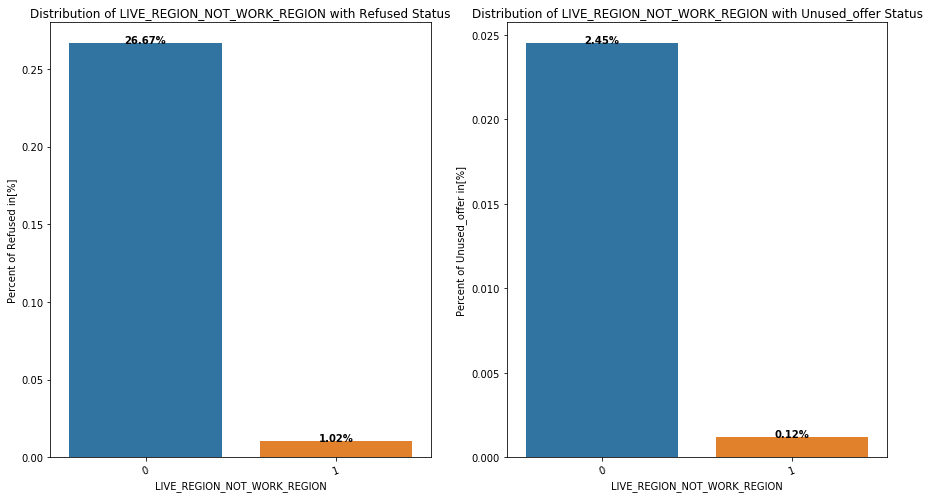

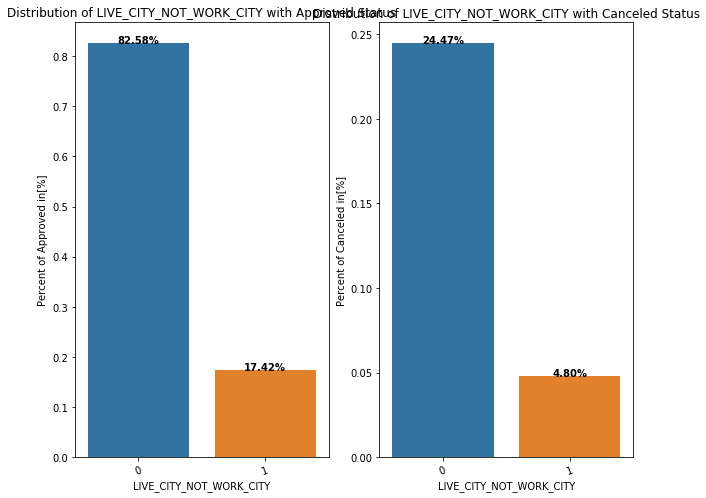

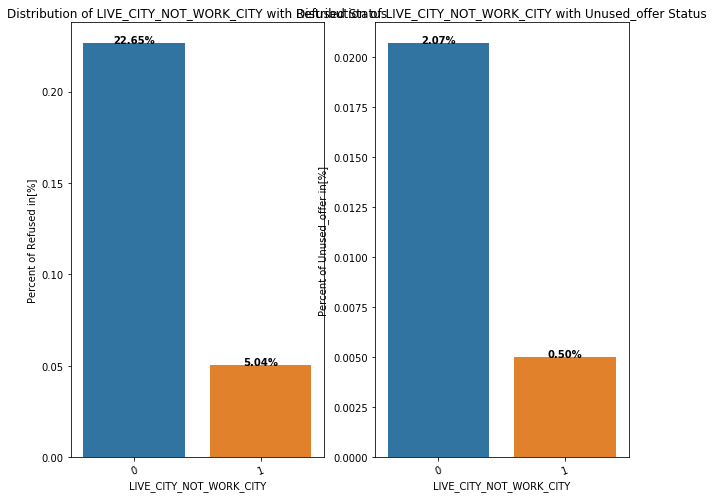

In [167]:
plotcategorical_merged('REG_REGION_NOT_LIVE_REGION',15,8)
plotcategorical_merged('REG_REGION_NOT_WORK_REGION',15,8)
plotcategorical_merged('REG_CITY_NOT_LIVE_CITY',15,8)
plotcategorical_merged('REG_CITY_NOT_WORK_CITY',10,8)
plotcategorical_merged('LIVE_REGION_NOT_WORK_REGION',15,8)
plotcategorical_merged('LIVE_CITY_NOT_WORK_CITY',10,8)


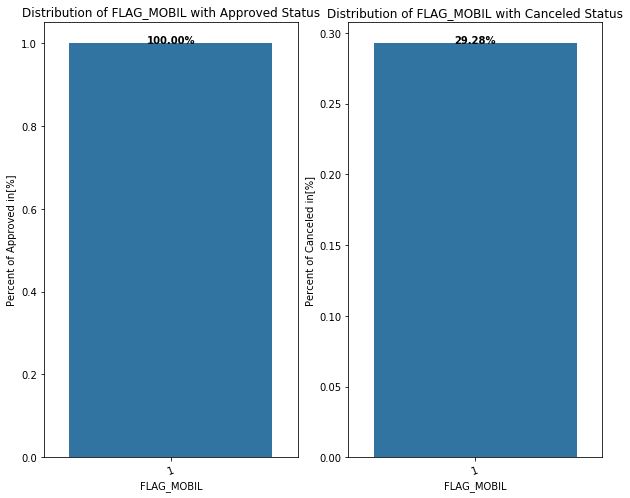

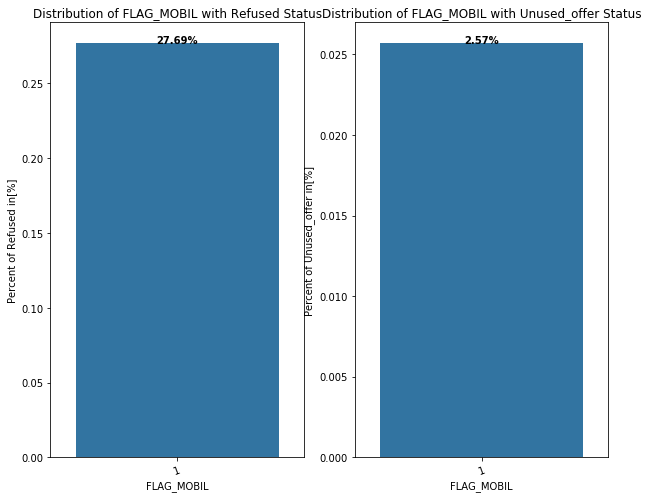

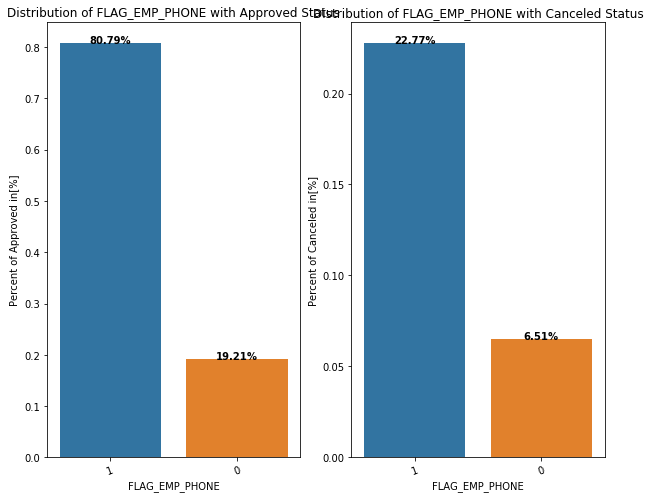

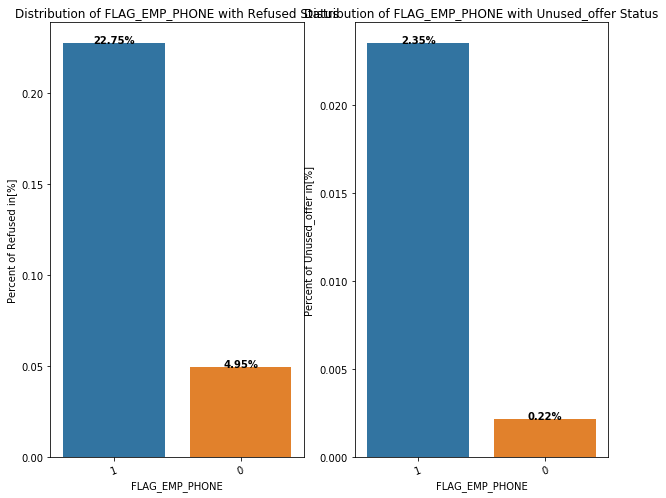

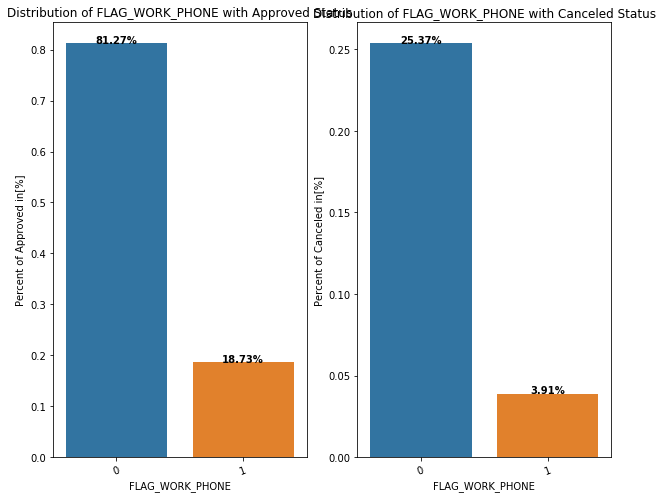

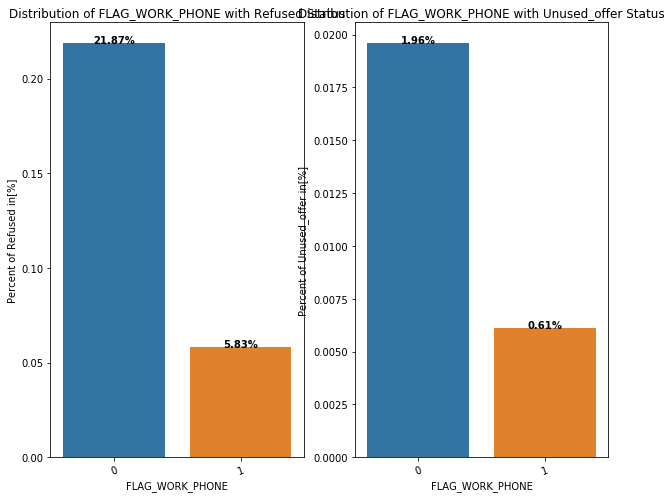

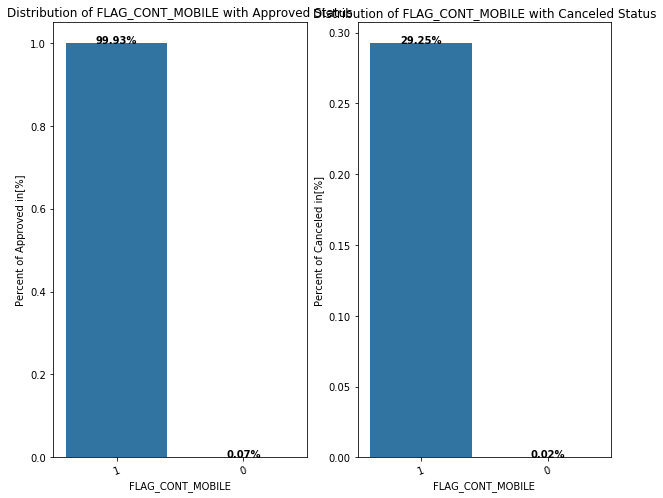

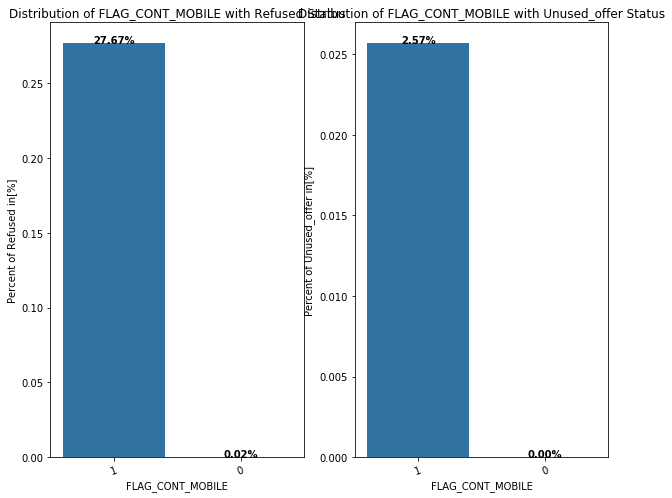

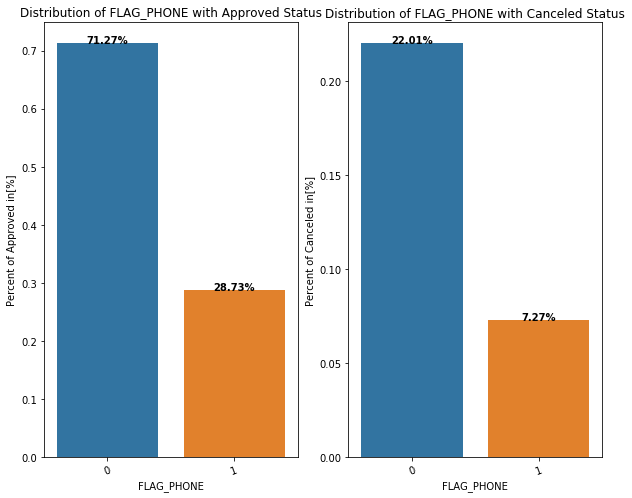

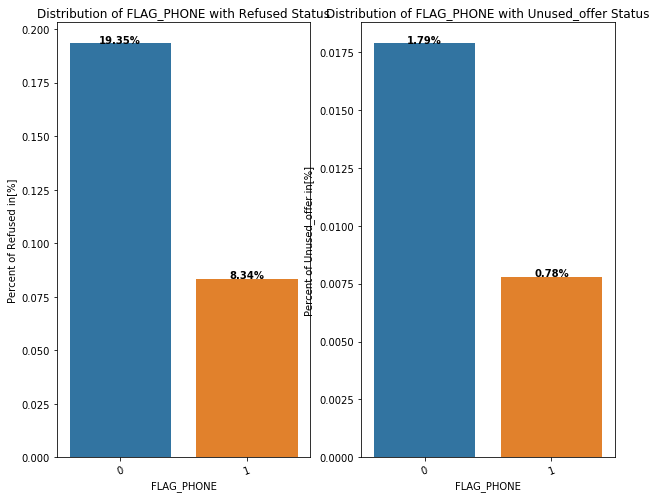

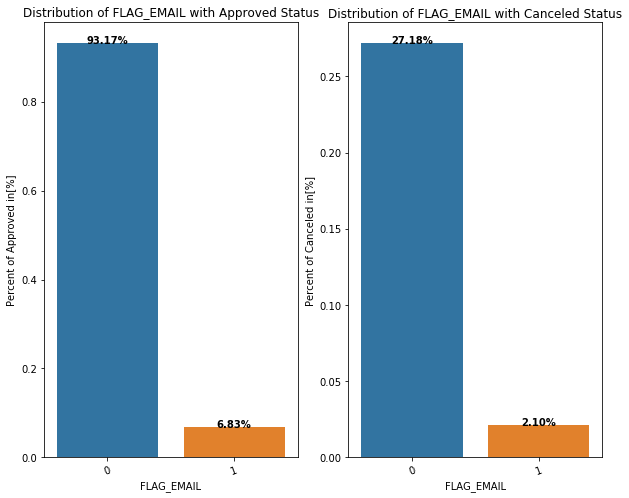

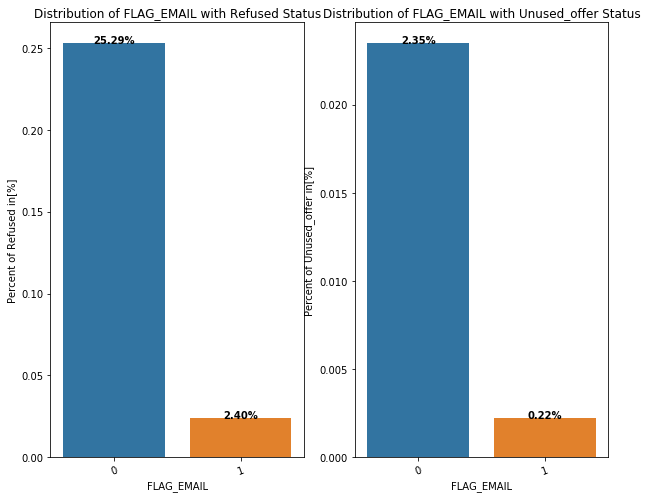

In [168]:
plotcategorical_merged('FLAG_MOBIL',10,8)
plotcategorical_merged('FLAG_EMP_PHONE',10,8)
plotcategorical_merged('FLAG_WORK_PHONE',10,8)
plotcategorical_merged('FLAG_CONT_MOBILE',10,8)
plotcategorical_merged('FLAG_PHONE',10,8)
plotcategorical_merged('FLAG_EMAIL',10,8)


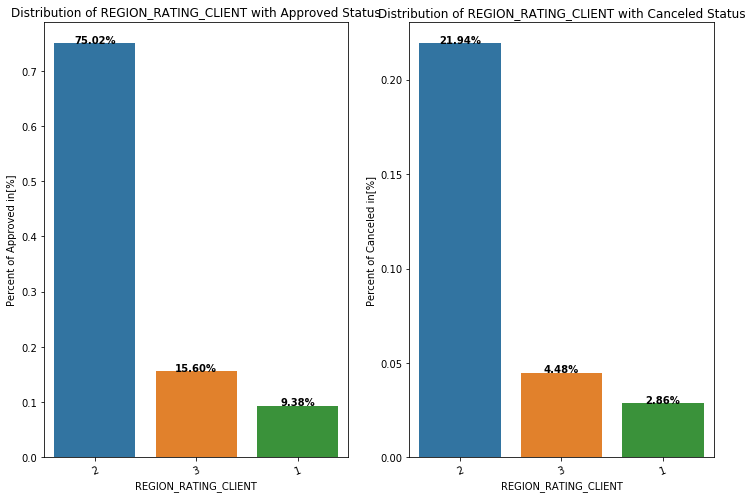

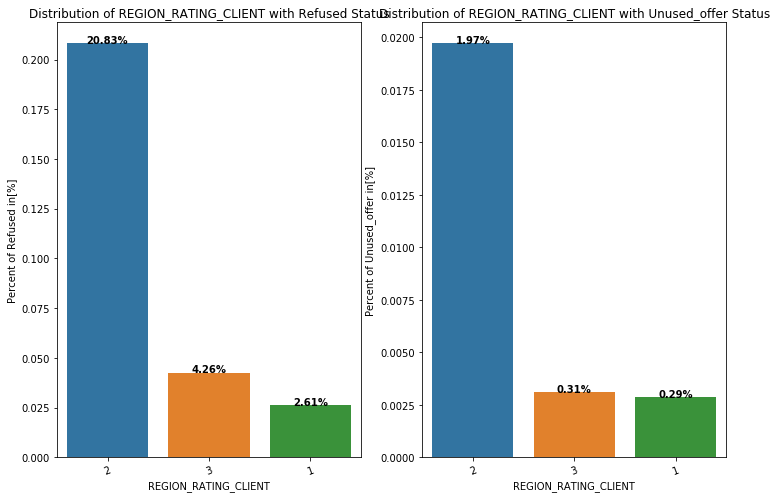

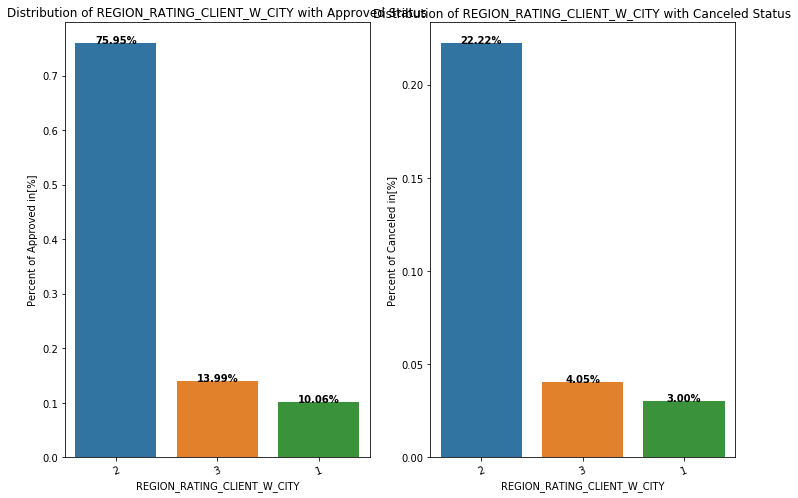

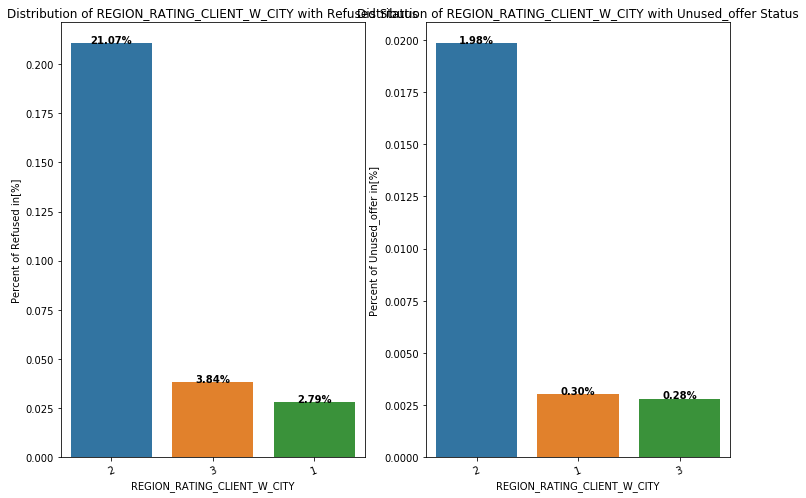

In [169]:
plotcategorical_merged('REGION_RATING_CLIENT',12,8)
plotcategorical_merged('REGION_RATING_CLIENT_W_CITY',12,8)
